In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#finalgen_samples = pd.read_csv('../final_gen.csv')['sample_name']
first_gen = pd.read_csv('../key_files/generation_1_sample_names.txt',header=None)[0]
samples = first_gen.to_list()

#clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bio')
clim_sites_during_exp = pd.read_csv('../key_files/bioclimvars_sites_era5_year_2018.csv')


env = clim_sites_during_exp.drop_duplicates()

In [3]:
go = pd.read_csv('../binomial_regression_firstgen_go/genomic_offset_per_site_firt_gen_prob_squared_l1out_all_proba.csv')

In [4]:
go_site = go.sum(axis=0)

In [5]:
go_site = go_site.reset_index()

In [6]:
go_site = pd.read_csv('../binomial_regression_firstgen_go/go_w_exctintsites.csv')

In [7]:
go_site = pd.read_csv('../binomial_regression_firstgen_go/go_wo_exctintsites.csv')

In [8]:
go_site = pd.read_csv('../binomial_regression_firstgen_go/go_wo_exctintsites_sign_snps.csv')

In [16]:
go_site = pd.read_csv('../gradient_f_run/go_gf_l1o.csv')

In [22]:
go_site = pd.read_csv('../binomial_regression_firstgen_go/go_sign_snps_from_founder_pop_l1o.csv')

In [5]:
go_site = pd.read_csv('../gradient_f_run/bio1_go_gf_l1o.csv')

In [23]:
go_site.columns = ['site', 'go']

In [24]:
go_site.dtypes

site      int64
go      float64
dtype: object

In [11]:
go_site.dtypes

site      int64
go      float64
dtype: object

In [12]:
go_site.dtypes

site      int64
go      float64
dtype: object

In [34]:
survival = pd.read_csv('../key_files/survival.csv')

In [35]:
survival['plot'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '18', 'no_flowering', nan,
       'no_germination', '17', 'not_successful', 'no_grenenet',
       'no_existence'], dtype=object)

In [33]:
survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '1_survival'] = 0 
survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '2_survival'] = 0 
survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '3_survival'] = 0 
survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '4_survival'] = 0 
survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '5_survival'] = 0 

In [12]:
survival.loc[survival['plot'].isin(['no_germination', 'no_flowering'])]['site'].values

array([ 7., 50., 56., 21., 41., 47., 51.])

In [13]:
survival.loc[survival['plot'].isin(['no_germination', 'no_flowering'])]

,site,plot,comments,1_flowerstotal,1_survival,1_comments,2_flowerstotal,2_survival,2_comments,3_flowerstotal,3_survival,3_comments,4_flowerstotal,4_survival,4_comments,5_flowerstotal,5_survival,5_comments
77,7.0,no_flowering,"Some flowers were seen in March, but no more i...",NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
144,50.0,no_flowering,Survived but did not reproduce,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
145,56.0,no_flowering,germinants died frozen,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
146,21.0,no_germination,"They died, high altitude climate",NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
227,41.0,no_germination,Cold-driven mortality,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
254,47.0,no_germination,"based on diary, no germination",NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
411,51.0,no_flowering,They planted but never saw anything,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN


In [18]:
env[env['site'].isin([ 7, 50, 56, 21, 41, 47])]

,site,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
6,7,10.797765,20.586847,39.882833,1030.830394,32.146387,-19.471930,51.618317,15.086000,22.495865,22.950088,-1.041393,1293.883104,181.219089,53.744202,34.130022,429.461414,225.973296,297.828415,324.530993
14,21,10.468105,20.553860,54.112050,665.311068,30.907129,-7.076758,37.983887,6.837858,19.371059,19.713707,3.683402,923.871648,286.168895,1.193478,99.634073,477.612575,42.556477,130.893234,362.773909
26,41,10.766147,21.493160,45.974674,851.702855,34.256982,-12.493018,46.750000,19.097041,3.823434,20.735915,0.432615,510.242859,85.770169,15.008776,59.025471,161.753297,67.535476,131.399152,91.684643
31,47,12.108131,20.857874,45.498960,862.740721,34.997217,-10.845313,45.842529,5.443908,18.448469,22.174651,1.390461,449.103471,81.354710,11.222201,62.657870,175.563941,71.612353,93.469942,160.419427
34,50,8.899919,26.094484,40.940315,1181.440894,34.912988,-28.824881,63.737869,18.335871,-3.894850,22.746645,-4.196521,1000.228857,144.113776,36.474634,40.976197,319.921189,180.122617,287.915465,219.656320
40,56,6.148721,17.939881,35.676046,1024.092903,30.984766,-19.300742,50.285507,17.757768,3.145483,18.242594,-5.911454,569.462239,74.026760,20.301564,38.521391,199.790652,88.196416,163.896110,123.012575


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

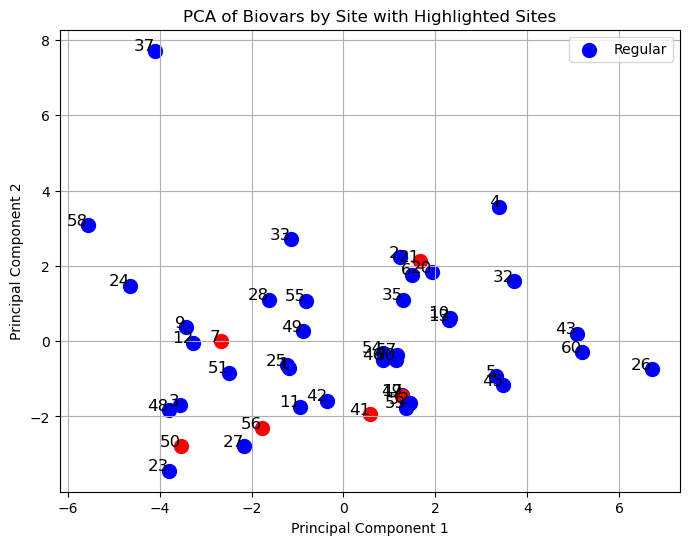

In [47]:
# Separating features and scaling
features = env.iloc[:, 1:]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# PCA transformation
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Creating a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['site'] = env['site'].values

# Defining the sites to be colored differently
highlight_sites = {7, 50, 56, 21, 41, 47}

# Plotting PCA visualization with color differentiation
plt.figure(figsize=(8, 6))

# Loop through each site and plot with respective color
for i, site in enumerate(pca_df['site']):
    if site in highlight_sites:
        plt.scatter(pca_df['PC1'][i], pca_df['PC2'][i], color='red', label='Highlighted' if i == 0 else "", s=100)
    else:
        plt.scatter(pca_df['PC1'][i], pca_df['PC2'][i], color='blue', label='Regular' if i == 0 else "", s=100)
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], str(site), fontsize=12, ha='right')

plt.title('PCA of Biovars by Site with Highlighted Sites')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()


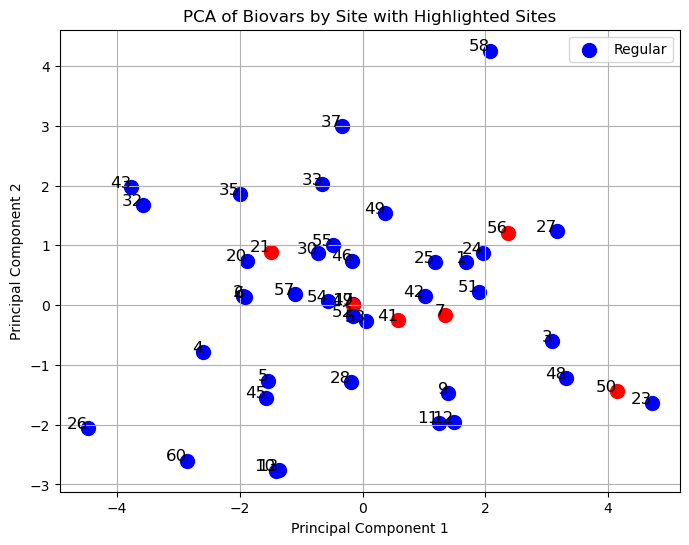

In [48]:
# Separating features and scaling
features = env.iloc[:, 1:10]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# PCA transformation
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Creating a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['site'] = env['site'].values

# Defining the sites to be colored differently
highlight_sites = {7, 50, 56, 21, 41, 47}

# Plotting PCA visualization with color differentiation
plt.figure(figsize=(8, 6))

# Loop through each site and plot with respective color
for i, site in enumerate(pca_df['site']):
    if site in highlight_sites:
        plt.scatter(pca_df['PC1'][i], pca_df['PC2'][i], color='red', label='Highlighted' if i == 0 else "", s=100)
    else:
        plt.scatter(pca_df['PC1'][i], pca_df['PC2'][i], color='blue', label='Regular' if i == 0 else "", s=100)
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], str(site), fontsize=12, ha='right')

plt.title('PCA of Biovars by Site with Highlighted Sites')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [88]:
env2 = env[['bio1', 'bio18']].copy()

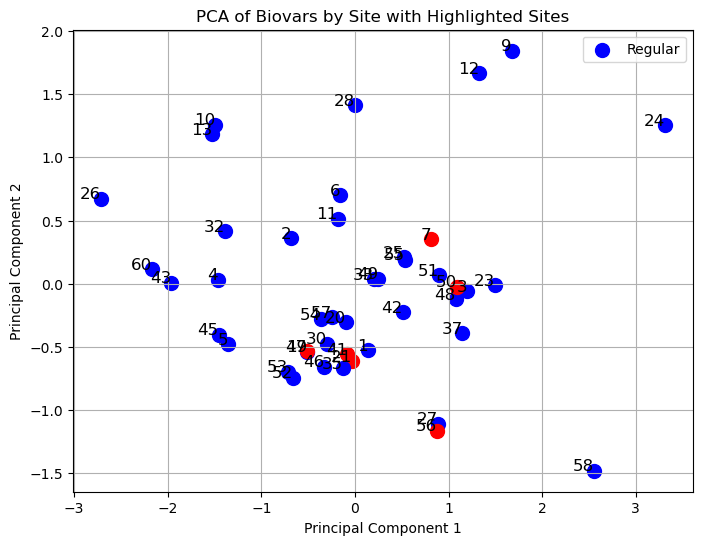

In [89]:
# Separating features and scaling
features = env2
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# PCA transformation
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Creating a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['site'] = env['site'].values

# Defining the sites to be colored differently
highlight_sites = {7, 50, 56, 21, 41, 47}

# Plotting PCA visualization with color differentiation
plt.figure(figsize=(8, 6))

# Loop through each site and plot with respective color
for i, site in enumerate(pca_df['site']):
    if site in highlight_sites:
        plt.scatter(pca_df['PC1'][i], pca_df['PC2'][i], color='red', label='Highlighted' if i == 0 else "", s=100)
    else:
        plt.scatter(pca_df['PC1'][i], pca_df['PC2'][i], color='blue', label='Regular' if i == 0 else "", s=100)
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], str(site), fontsize=12, ha='right')

plt.title('PCA of Biovars by Site with Highlighted Sites')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()


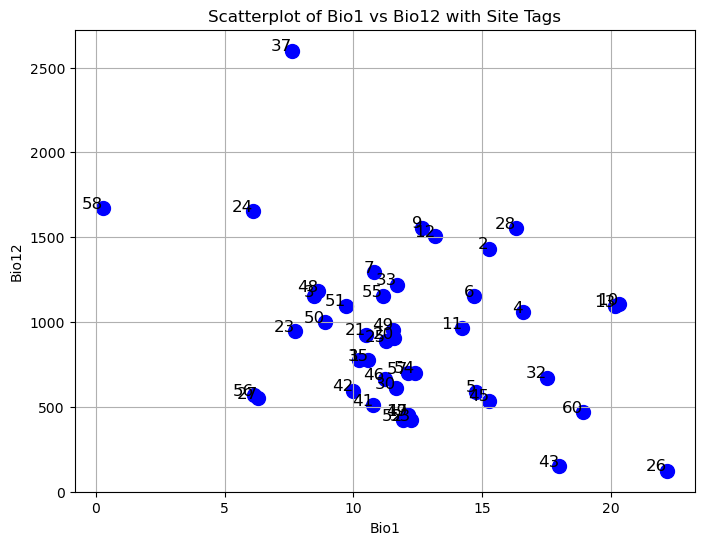

In [90]:
# Scatterplot of bio1 vs bio12 with site tags
plt.figure(figsize=(8, 6))

# Plotting the scatterplot
plt.scatter(env['bio1'], env['bio12'], color='blue', s=100)
for i, site in enumerate(env['site']):
    plt.text(env['bio1'][i], env['bio12'][i], str(site), fontsize=12, ha='right')

# Adding labels and title
plt.title('Scatterplot of Bio1 vs Bio12 with Site Tags')
plt.xlabel('Bio1')
plt.ylabel('Bio12')
plt.grid(True)
plt.show()


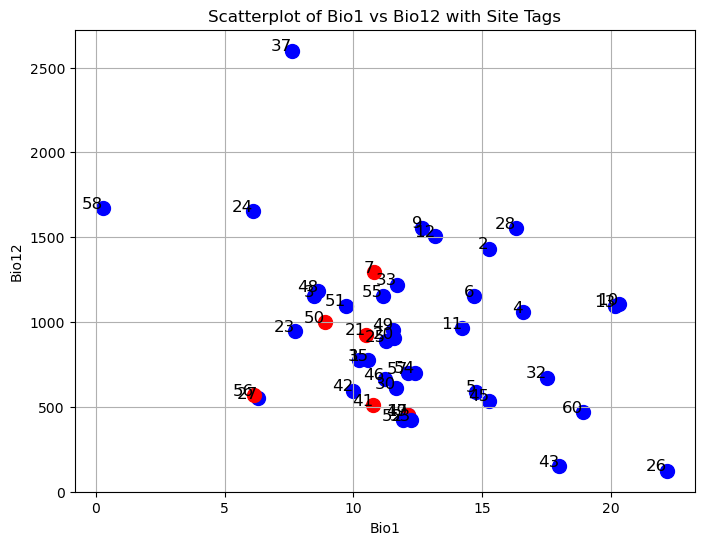

In [91]:
# Define the sites to be highlighted in red
highlight_sites = {7, 50, 56, 21, 41, 47}

# Scatterplot of bio1 vs bio12 with site tags and color differentiation
plt.figure(figsize=(8, 6))

# Plotting points with different colors based on site selection
for i, site in enumerate(env['site']):
    color = 'red' if site in highlight_sites else 'blue'
    plt.scatter(env['bio1'][i], env['bio12'][i], color=color, s=100)
    plt.text(env['bio1'][i], env['bio12'][i], str(site), fontsize=12, ha='right')

# Adding labels and title
plt.title('Scatterplot of Bio1 vs Bio12 with Site Tags')
plt.xlabel('Bio1')
plt.ylabel('Bio12')
plt.grid(True)
plt.show()


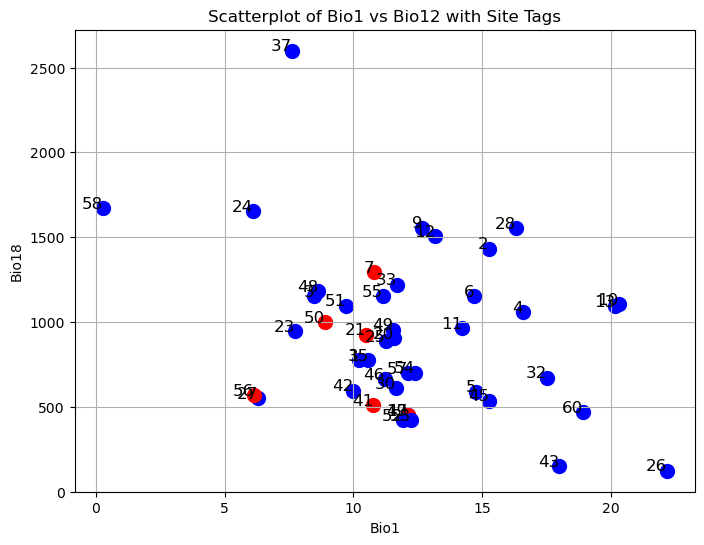

In [92]:
# Define the sites to be highlighted in red
highlight_sites = {7, 50, 56, 21, 41, 47}

# Scatterplot of bio1 vs bio12 with site tags and color differentiation
plt.figure(figsize=(8, 6))

# Plotting points with different colors based on site selection
for i, site in enumerate(env['site']):
    color = 'red' if site in highlight_sites else 'blue'
    plt.scatter(env['bio1'][i], env['bio12'][i], color=color, s=100)
    plt.text(env['bio1'][i], env['bio12'][i], str(site), fontsize=12, ha='right')

# Adding labels and title
plt.title('Scatterplot of Bio1 vs Bio12 with Site Tags')
plt.xlabel('Bio1')
plt.ylabel('Bio18')
plt.grid(True)
plt.show()

In [69]:
year_survival = '2_survival'

<Axes: xlabel='bio1', ylabel='2_survival'>

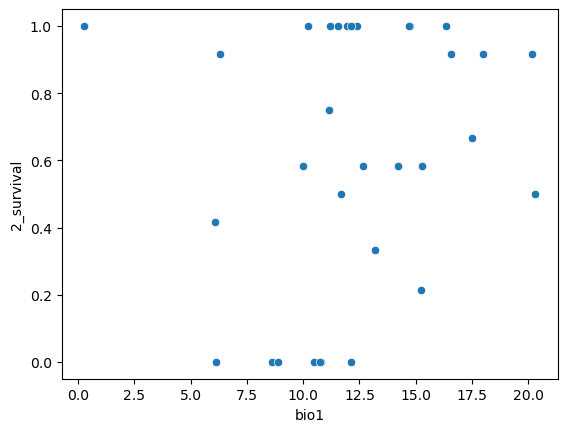

In [70]:
survival_1year = survival.copy()

survival_1year.loc[survival_1year['plot'].isin(['no_germination', 'no_flowering']), year_survival] = 0

survival_1year = survival_1year[survival_1year[year_survival].isin([1.0, 0.0])]

survival_1year = survival_1year[['site', year_survival]].groupby('site')[year_survival].mean().reset_index()

survival_1year = survival_1year.merge(env)

sns.scatterplot(data = survival_1year, x = 'bio1', y = year_survival)

In [71]:
year_survival = '3_survival'

<Axes: xlabel='bio1', ylabel='3_survival'>

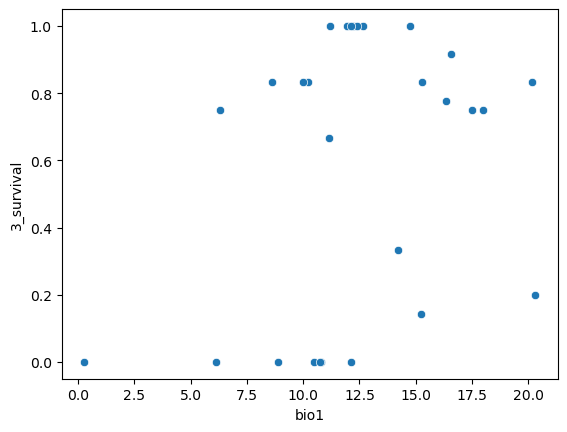

In [72]:
survival_1year = survival.copy()

survival_1year.loc[survival_1year['plot'].isin(['no_germination', 'no_flowering']), year_survival] = 0

survival_1year = survival_1year[survival_1year[year_survival].isin([1.0, 0.0])]

survival_1year = survival_1year[['site', year_survival]].groupby('site')[year_survival].mean().reset_index()

survival_1year = survival_1year.merge(env)

sns.scatterplot(data = survival_1year, x = 'bio1', y = year_survival)

In [73]:
year_survival = '4_survival'

<Axes: xlabel='bio1', ylabel='4_survival'>

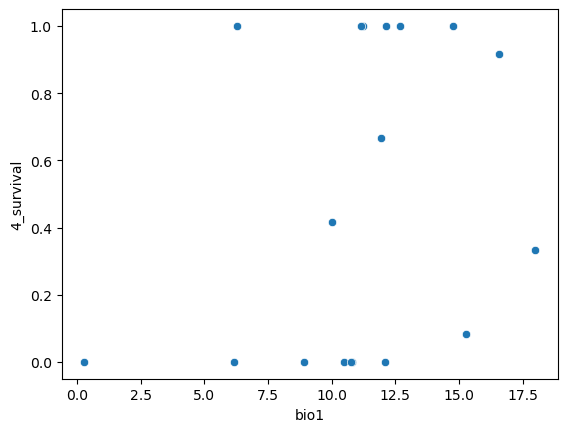

In [74]:
survival_1year = survival.copy()

survival_1year.loc[survival_1year['plot'].isin(['no_germination', 'no_flowering']), year_survival] = 0

survival_1year = survival_1year[survival_1year[year_survival].isin([1.0, 0.0])]

survival_1year = survival_1year[['site', year_survival]].groupby('site')[year_survival].mean().reset_index()

survival_1year = survival_1year.merge(env)

sns.scatterplot(data = survival_1year, x = 'bio1', y = year_survival)

In [25]:
year = 2

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

def analyze_survival(survival, go_site, year):
    """
    Analyzes survival data for a specified year, calculates mean survival per site,
    and generates a regression plot with p-values.

    Parameters:
    survival (pd.DataFrame): DataFrame containing survival data.
    go_site (pd.DataFrame): DataFrame with site and index information.
    year (int): Year of survival to analyze (e.g., 3 for '3_survival').

    Returns:
    pd.DataFrame: DataFrame with site, survival, index, and go values.
    """
    # Select the survival column for the specified year
    survival_col = f"{year}_survival"
    survival_year = survival[['site', survival_col]]

    # Filter out non-binary survival values (only keep 1.0 and 0.0)
    survival_year = survival_year[survival_year[survival_col].isin([1.0, 0.0])]

    # Group by site and calculate mean survival
    survival_year = survival_year.groupby('site')[survival_col].mean().reset_index()

    # Merge with go_site data
    merged = survival_year.merge(go_site, left_on='site', right_on='site')

    # Rename columns for clarity
    merged.columns = ['site', survival_col, 'go']

    # Perform simple linear regression
    slope, intercept, r_value, p_value, std_err = linregress(merged['go'], merged[survival_col])

    # Plotting the regression
    plt.figure(figsize=(8, 6))
    sns.regplot(x='go', y=survival_col, data=merged)
    plt.title(f'Regression of Survival ({year}_survival) vs. GO')
    plt.xlabel('GO')
    plt.ylabel(f'Survival Year {year}')
    for i, row in merged.iterrows():
        plt.annotate(f"Site {int(row['site'])}", 
                     (row['go'], row[survival_col]), 
                     textcoords="offset points", 
                     xytext=(5, 5), 
                     ha='center', 
                     fontsize=9, 
                     color='blue')

    # Display regression stats on the plot
    plt.annotate(f'R-squared: {r_value**2:.2f}\nP-value: {p_value:.2e}',
                 xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, 
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgray"))
    plt.show()

    print(f"Linear Regression Results for Year {year}:")
    print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}")
    print(f"R-squared: {r_value**2:.4f}, P-value: {p_value:.4e}")

    return merged


# Example usage
# result = analyze_survival(survival, go_site, 3)


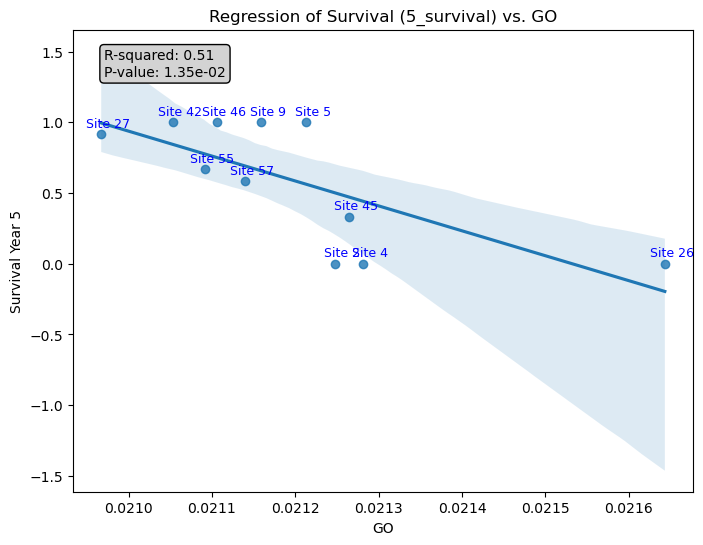

Linear Regression Results for Year 5:
Slope: -1762.4376, Intercept: 37.9491
R-squared: 0.5107, P-value: 1.3460e-02


,site,5_survival,go
0,2.0,0.000000,0.021248
1,4.0,0.000000,0.021281
2,5.0,1.000000,0.021213
3,9.0,1.000000,0.021158
4,26.0,0.000000,0.021643
5,27.0,0.916667,0.020967
6,42.0,1.000000,0.021053
7,45.0,0.333333,0.021265
8,46.0,1.000000,0.021106
9,55.0,0.666667,0.021091


In [52]:
analyze_survival(survival, go_site, 5)

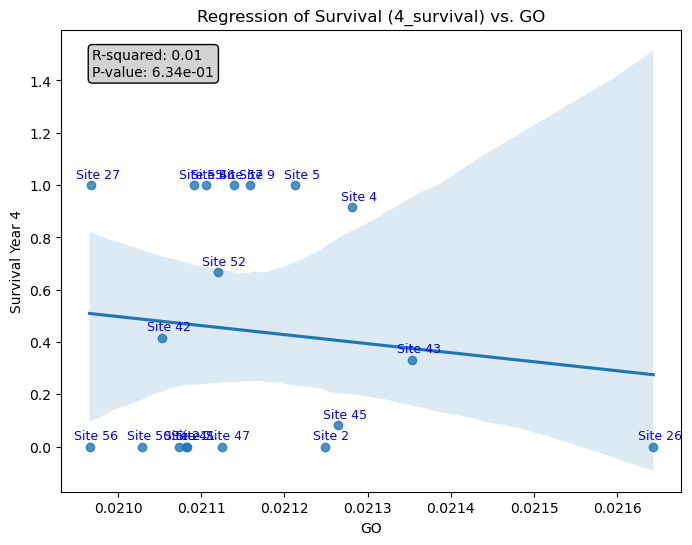

Linear Regression Results for Year 4:
Slope: -345.1737, Intercept: 7.7461
R-squared: 0.0137, P-value: 6.3363e-01


,site,4_survival,go
0,2.0,0.000000,0.021248
1,4.0,0.916667,0.021281
2,5.0,1.000000,0.021213
3,7.0,0.000000,0.021083
4,9.0,1.000000,0.021158
5,21.0,0.000000,0.021073
6,26.0,0.000000,0.021643
7,27.0,1.000000,0.020967
8,41.0,0.000000,0.021082
9,42.0,0.416667,0.021053


In [36]:
analyze_survival(survival, go_site, 4)

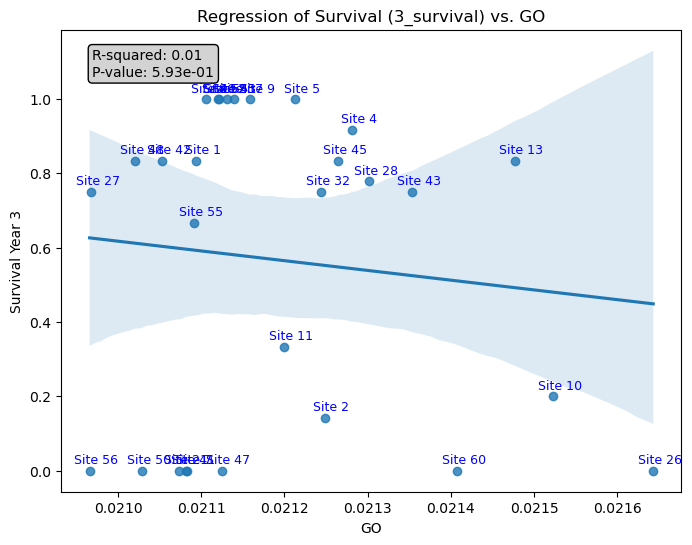

Linear Regression Results for Year 3:
Slope: -261.9024, Intercept: 6.1171
R-squared: 0.0107, P-value: 5.9303e-01


,site,3_survival,go
0,1.0,0.833333,0.021093
1,2.0,0.142857,0.021248
2,4.0,0.916667,0.021281
3,5.0,1.000000,0.021213
4,7.0,0.000000,0.021083
5,9.0,1.000000,0.021158
6,10.0,0.200000,0.021523
7,11.0,0.333333,0.021200
8,13.0,0.833333,0.021477
9,21.0,0.000000,0.021073


In [37]:
analyze_survival(survival, go_site, 3)

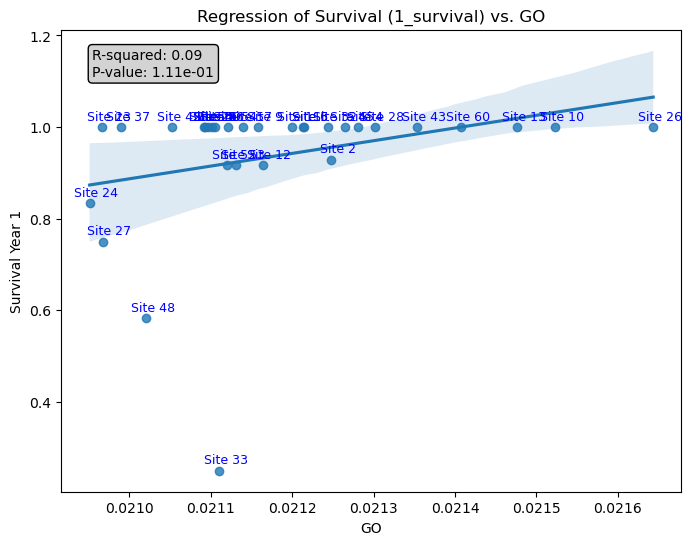

Linear Regression Results for Year 1:
Slope: 277.1804, Intercept: -4.9336
R-squared: 0.0853, P-value: 1.1083e-01


,site,1_survival,go
0,1.0,1.000000,0.021093
1,2.0,0.928571,0.021248
2,4.0,1.000000,0.021281
3,5.0,1.000000,0.021213
4,6.0,1.000000,0.021214
5,9.0,1.000000,0.021158
6,10.0,1.000000,0.021523
7,11.0,1.000000,0.021200
8,12.0,0.916667,0.021164
9,13.0,1.000000,0.021477


In [19]:
analyze_survival(survival, go_site, 1)

In [58]:
survival_year4 = survival[['site', '2_survival']]

survival_year4['2_survival'].unique()

survival_year4 = survival_year4[survival_year4['2_survival'].isin([1.,  0.])]

survival_year4 = survival_year4.groupby('site')['2_survival'].mean()

survival_year4 = survival_year4.reset_index().merge(go_site, left_on = 'site', right_on = 'index')

survival_year4.columns = ['site', '2_survival', 'index', 'go']

<Axes: xlabel='go', ylabel='2_survival'>

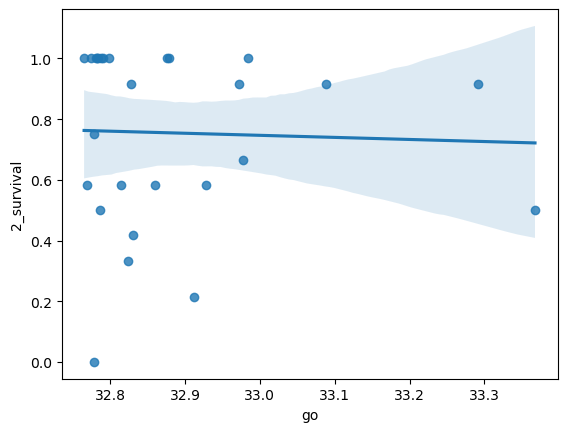

In [59]:
sns.regplot(data = survival_year4, x = 'go', y = '2_survival')

In [101]:
survival

,site,plot,comments,1_flowerstotal,1_survival,1_comments,2_flowerstotal,2_survival,2_comments,3_flowerstotal,3_survival,3_comments,4_flowerstotal,4_survival,4_comments,5_flowerstotal,5_survival,5_comments
0,1,1,NaN,146.0,1.0,NaN,208.0,1.0,NaN,24.0,1.0,NaN,NaN,NaN,no_info,NaN,NaN,NaN
1,1,2,NaN,235.0,1.0,NaN,194.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,no_info,NaN,NaN,NaN
2,1,3,NaN,229.0,1.0,NaN,117.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,no_info,NaN,NaN,NaN
3,1,4,NaN,233.0,1.0,NaN,235.0,1.0,NaN,20.0,1.0,NaN,NaN,NaN,no_info,NaN,NaN,NaN
4,1,5,NaN,226.0,1.0,NaN,204.0,1.0,NaN,72.0,1.0,NaN,NaN,NaN,no_info,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,60,8,NaN,24.0,1.0,NaN,NaN,NaN,no_info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
425,60,9,NaN,7.0,1.0,NaN,NaN,NaN,no_info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
426,60,10,NaN,21.0,1.0,NaN,NaN,NaN,no_info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,60,11,NaN,20.0,1.0,NaN,NaN,NaN,no_info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
survival_year4 = survival[['site', '3_survival']]

survival_year4['3_survival'].unique()

survival_year4 = survival_year4[survival_year4['3_survival'].isin([1,  0])]

survival_year4 = survival_year4.groupby('site')['3_survival'].mean()

survival_year4 = survival_year4.reset_index().merge(go_site, left_on = 'site', right_on = 'index')

survival_year4.columns = ['site', '3_survival', 'index', 'go']

In [100]:
survival_year4

,site,3_survival,index,go
0,1,0.833333,1,32.765266
1,2,0.142857,2,32.912635
2,4,0.916667,4,32.971847
3,5,1.000000,5,32.875461
4,9,1.000000,9,32.814391
5,10,0.200000,10,33.367617
6,11,0.333333,11,32.859565
7,13,0.833333,13,33.291949
8,27,0.750000,27,32.828261
9,28,0.777778,28,32.984708


<Axes: xlabel='go', ylabel='3_survival'>

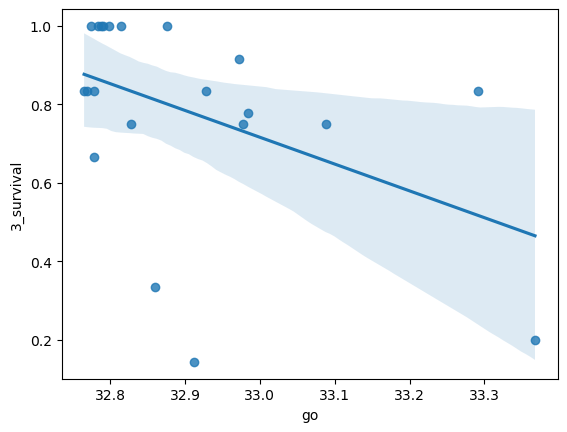

In [97]:
sns.regplot(data = survival_year4, x = 'go', y = '3_survival')

<Axes: xlabel='go', ylabel='3_survival'>

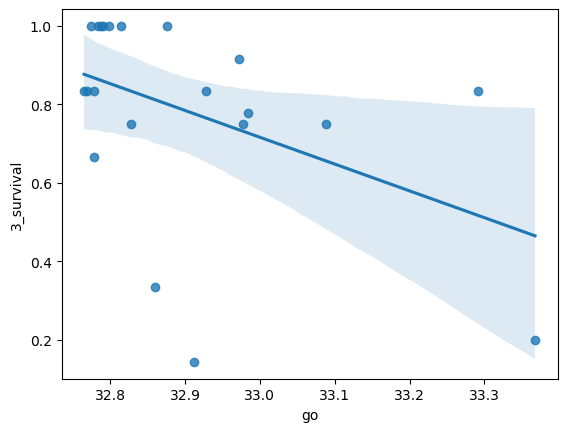

In [57]:
sns.regplot(data = survival_year4, x = 'go', y = '3_survival')

In [ ]:
survival_year4 = survival[['site', '4_survival']]

survival_year4['4_survival'].unique()

survival_year4 = survival_year4[survival_year4['4_survival'].isin([1.,  0.])]

survival_year4 = survival_year4.groupby('site')['4_survival'].mean()

survival_year4 = survival_year4.reset_index().merge(go_site, left_on = 'site', right_on = 'index')

survival_year4.columns = ['site', '4_survival', 'index', 'go']

<Axes: xlabel='go', ylabel='4_survival'>

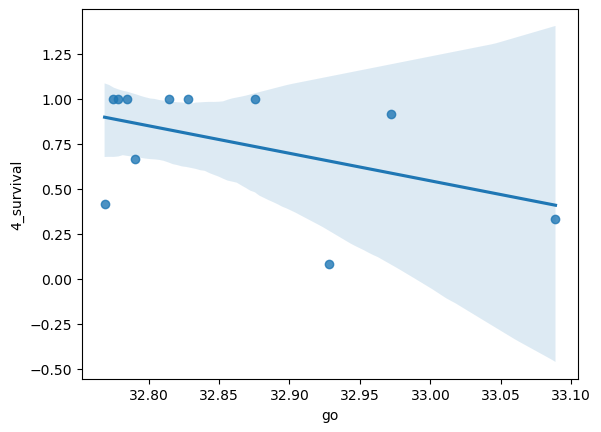

In [52]:
sns.regplot(data = survival_year4, x = 'go', y = '4_survival')

In [53]:
survival_year5 = survival[['site', '5_survival']]


survival_year5 = survival_year5[survival_year5['5_survival'].isin([1.,  0.])]

survival_year5 = survival_year5.groupby('site')['5_survival'].mean()

survival_year5 = survival_year5.reset_index().merge(go_site, left_on = 'site', right_on = 'index')

survival_year5.columns = ['site', '5_survival', 'index', 'go']

<Axes: xlabel='go', ylabel='5_survival'>

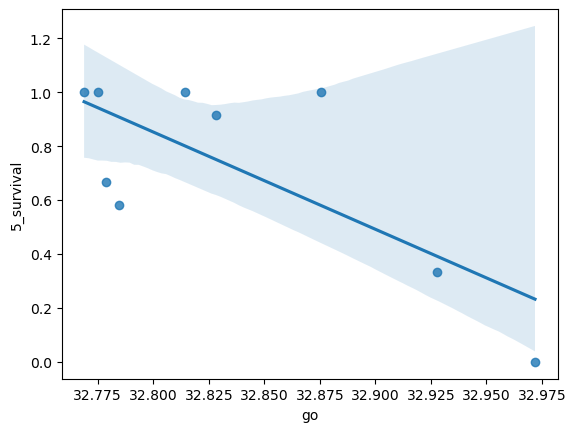

In [54]:
sns.regplot(data = survival_year5, x = 'go', y = '5_survival')

In [17]:
survival_year4.dropna()

13    -1.0
14    -1.0
21    -1.0
30     1.0
31     1.0
      ... 
411    0.0
412    0.0
413    0.0
414    0.0
415    0.0
Name: 4_survival, Length: 183, dtype: float64

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from adjustText import adjust_text

def analyze_survival_multiyear(survival, go_site, years=5):
    """
    Analyzes survival data for multiple years, calculates mean survival per site,
    and generates a multi-subplot figure with regression plots for each year.

    Parameters:
    survival (pd.DataFrame): DataFrame containing survival data.
    go_site (pd.DataFrame): DataFrame with site and index information.
    years (int): Number of years to analyze (default is 5).

    Returns:
    list: List of DataFrames with site, survival, and go values for each year.
    """
    fig, axes = plt.subplots(1, years, figsize=(5 * years, 6), sharey=True)
    plt.suptitle('Regression of Survival vs. GO for Multiple Years', fontsize=16)
    
    results = []

    for year in range(1, years + 1):
        # Select the survival column for the specified year
        survival_col = f"{year}_survival"
        survival_year = survival[['site', survival_col]]

        # Filter out non-binary survival values (only keep 1.0 and 0.0)
        survival_year = survival_year[survival_year[survival_col].isin([1.0, 0.0])]

        # Group by site and calculate mean survival
        survival_year = survival_year.groupby('site')[survival_col].mean().reset_index()

        # Merge with go_site data
        merged = survival_year.merge(go_site, left_on='site', right_on='site')

        # Rename columns for clarity
        merged.columns = ['site', survival_col, 'go']

        # Perform simple linear regression
        slope, intercept, r_value, p_value, std_err = linregress(merged['go'], merged[survival_col])

        # Plotting the regression on a subplot
        sns.regplot(x='go', y=survival_col, data=merged, ax=axes[year - 1])
        axes[year - 1].set_title(f'Year {year} Survival', fontsize=14)
        axes[year - 1].set_xlabel('GO', fontsize=12)
        axes[year - 1].set_ylabel(f'Survival (Year {year})', fontsize=12)

        # Using adjustText to improve label positioning
        texts = []
        for i, row in merged.iterrows():
            text = axes[year - 1].text(row['go'], row[survival_col], f"Site {int(row['site'])}",
                                       fontsize=9, color='blue', ha='center')
            texts.append(text)
        
        # Adjusting text to avoid overlaps
        adjust_text(texts, ax=axes[year - 1], 
                    only_move={'points': 'xy', 'text': 'xy'}, 
                    arrowprops=dict(arrowstyle='->', color='black'))

        # Display regression stats on the subplot
        axes[year - 1].annotate(f'R²: {r_value**2:.2f}\nP: {p_value:.2e}',
                                xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, 
                                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgray"))

        # Print regression stats
        print(f"Year {year} - Slope: {slope:.4f}, Intercept: {intercept:.4f}")
        print(f"R-squared: {r_value**2:.4f}, P-value: {p_value:.4e}")

        # Append result to list
        results.append(merged)

    plt.ylim(-0.5, 1.5)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #plt.savefig('Survival_pred_from_GO_l1o.png')
    plt.show()

    return 0

# Example usage
# results = analyze_sur_


In [78]:
go_site = pd.read_csv('../binomial_regression_firstgen_go/go_sign_snps_from_founder_pop.csv')

In [79]:
sum = env[['site', 'bio1']].copy().merge(go_site)

<Axes: xlabel='bio1', ylabel='go'>

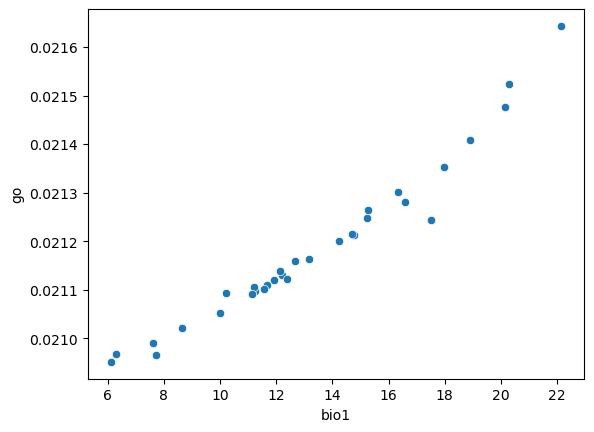

In [80]:
sns.scatterplot(sum,x = 'bio1', y = 'go')

In [64]:
go_site = pd.read_csv('../binomial_regression_firstgen_go/go_from_founder_pop_all_sites_intraining.csv')

In [65]:
sum = env[['site', 'bio1']].copy().merge(go_site)

<Axes: xlabel='bio1', ylabel='go'>

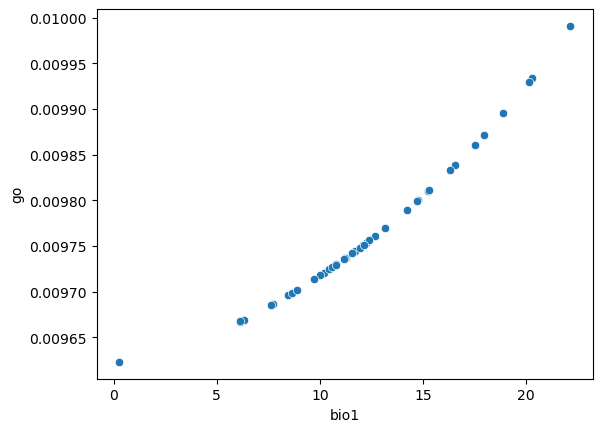

In [66]:
sns.scatterplot(sum,x = 'bio1', y = 'go')

<Axes: xlabel='bio1', ylabel='go_inv'>

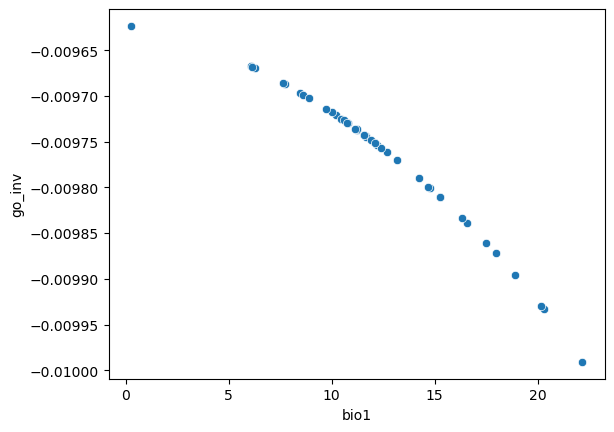

In [68]:
sns.scatterplot(sum,x = 'bio1', y = 'go_inv')

In [81]:
from scipy.optimize import curve_fit
import numpy as np

In [84]:
sum['go_inv'] = -1 * sum['go']

In [85]:
df = sum.copy()

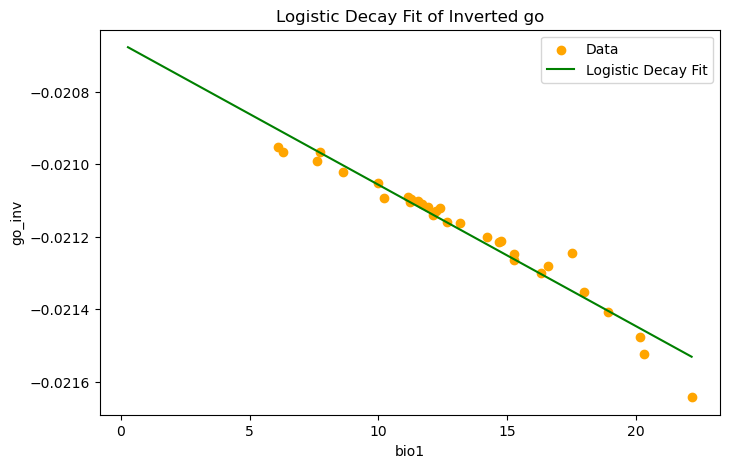

array([-1.96540270e+00,  8.06695061e-05, -3.03254271e+03,  1.08163992e+00])

In [87]:
# Define a logistic function to capture the transition
def logistic_decay(x, L, k, x0, c):
    return L / (1 + np.exp(-k * (x - x0))) + c

# Fit the logistic decay model to the data
popt_logistic, pcov_logistic = curve_fit(logistic_decay, df['bio1'], df['go_inv'], maxfev=100000)

# Generate predictions using the logistic fit
y_vals_logistic = logistic_decay(x_vals, *popt_logistic)

# Plot the original data and the logistic fitted curve
plt.figure(figsize=(8, 5))
plt.scatter(df['bio1'], df['go_inv'], label='Data', color='orange')
plt.plot(x_vals, y_vals_logistic, color='green', label='Logistic Decay Fit')
plt.xlabel('bio1')
plt.ylabel('go_inv')
plt.title('Logistic Decay Fit of Inverted go')
plt.legend()
plt.show()

popt_logistic

In [49]:
fgo = sum[['site', 'bio1']].copy()

In [50]:
fgo.columns = ['site', 'go']

Year 1 - Slope: 0.0095, Intercept: 0.8112
R-squared: 0.0768, P-value: 1.1854e-01
Year 2 - Slope: -0.0185, Intercept: 0.9581
R-squared: 0.0637, P-value: 1.7854e-01
Year 3 - Slope: -0.0116, Intercept: 0.8173
R-squared: 0.0219, P-value: 4.8005e-01
Year 4 - Slope: -0.0120, Intercept: 0.7134
R-squared: 0.0180, P-value: 6.3373e-01
Year 5 - Slope: -0.0778, Intercept: 1.6602
R-squared: 0.5158, P-value: 8.5191e-03


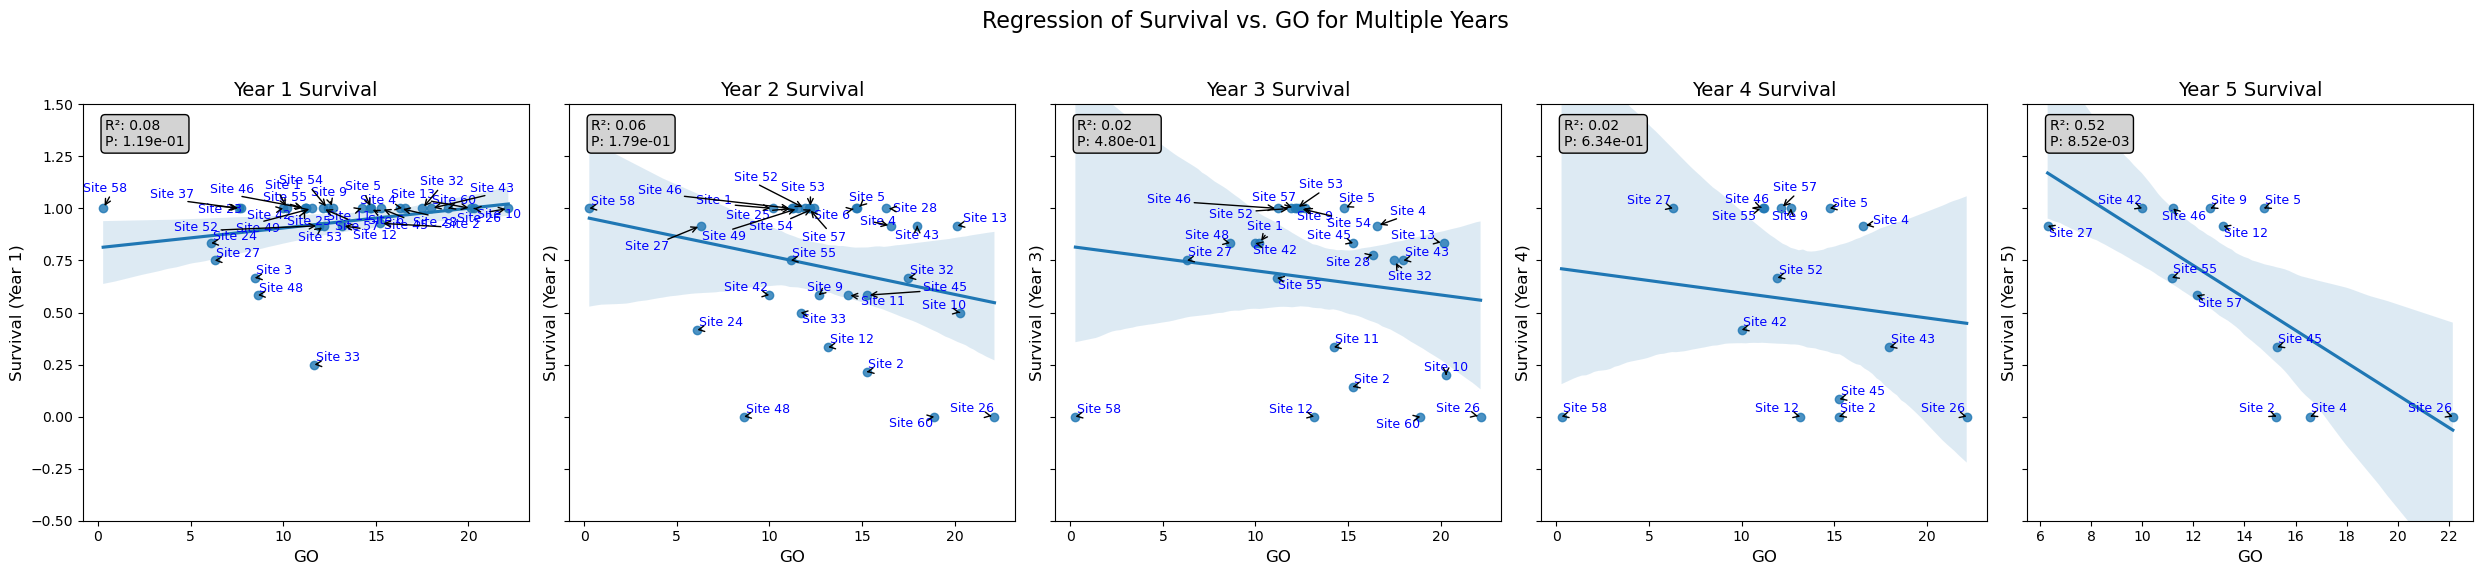

0

In [53]:
analyze_survival_multiyear(survival, fgo, years=5)

In [54]:
go_site = pd.read_csv('../binomial_regression_firstgen_go/go_from_founder_pop_all_sites_intraining.csv')

Year 1 - Slope: 558.9874, Intercept: -4.5318
R-squared: 0.0874, P-value: 9.4937e-02
Year 2 - Slope: -1192.3770, Intercept: 12.3781
R-squared: 0.0868, P-value: 1.1405e-01
Year 3 - Slope: -1229.7364, Intercept: 12.7002
R-squared: 0.0810, P-value: 1.6789e-01
Year 4 - Slope: -1424.9490, Intercept: 14.4912
R-squared: 0.0748, P-value: 3.2384e-01
Year 5 - Slope: -3802.7051, Intercept: 37.8193
R-squared: 0.5176, P-value: 8.3519e-03


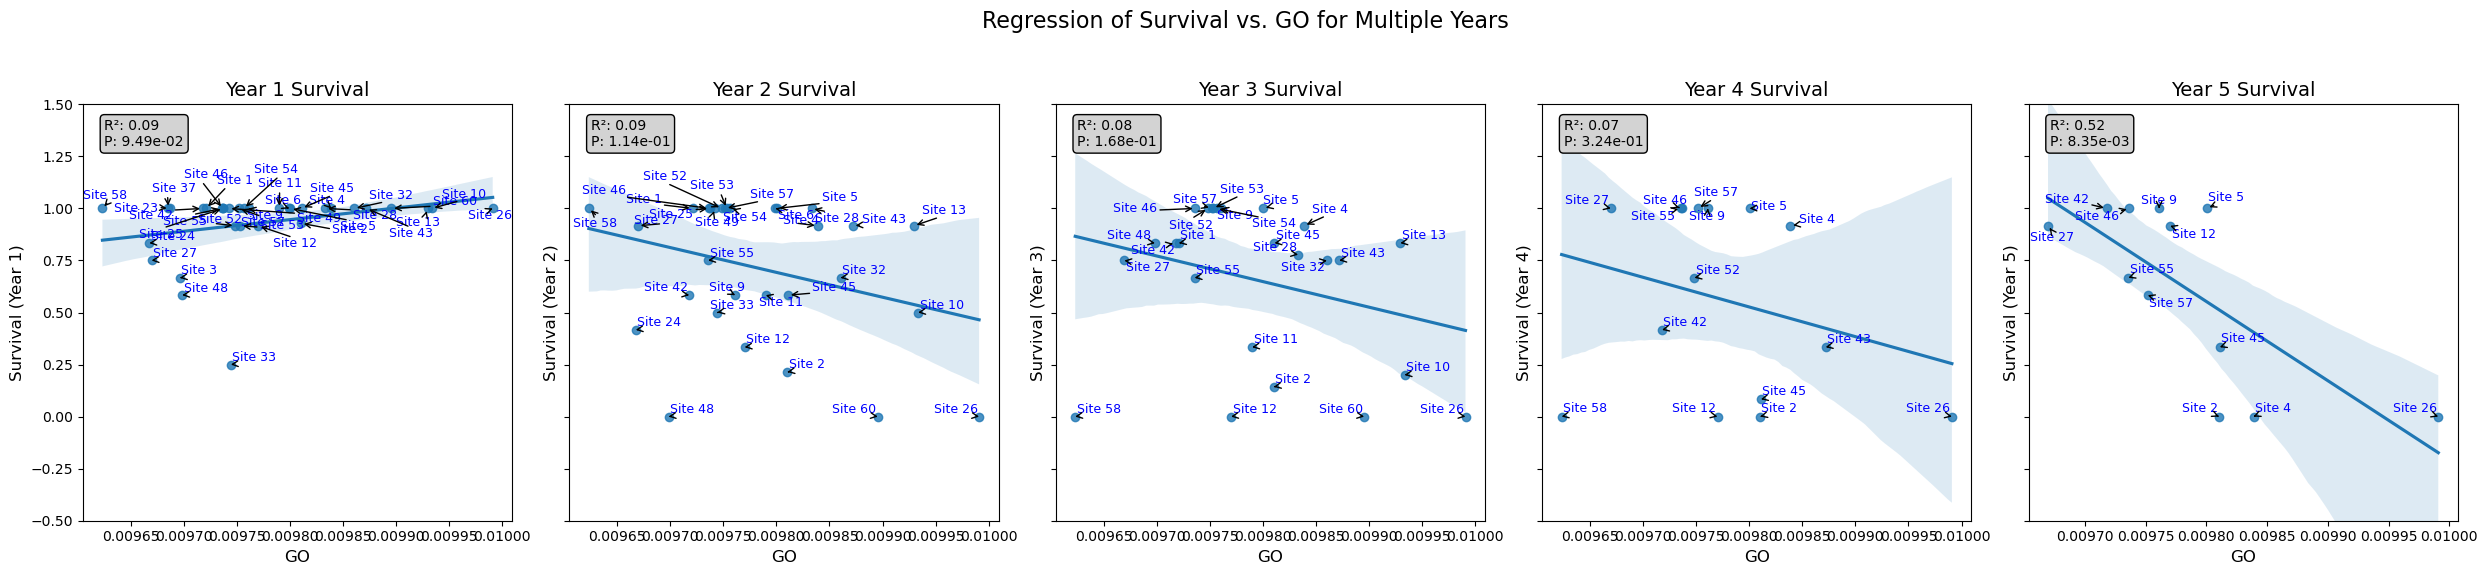

0

In [55]:
analyze_survival_multiyear(survival, go_site, years=5)

In [19]:
survival

,site,plot,comments,1_flowerstotal,1_survival,1_comments,2_flowerstotal,2_survival,2_comments,3_flowerstotal,3_survival,3_comments,4_flowerstotal,4_survival,4_comments,5_flowerstotal,5_survival,5_comments
0,1.0,1,NaN,146.0,1.0,NaN,208.0,1.0,NaN,24.0,1.0,NaN,NaN,NaN,no_info,NaN,NaN,NaN
1,1.0,2,NaN,235.0,1.0,NaN,194.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,no_info,NaN,NaN,NaN
2,1.0,3,NaN,229.0,1.0,NaN,117.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,no_info,NaN,NaN,NaN
3,1.0,4,NaN,233.0,1.0,NaN,235.0,1.0,NaN,20.0,1.0,NaN,NaN,NaN,no_info,NaN,NaN,NaN
4,1.0,5,NaN,226.0,1.0,NaN,204.0,1.0,NaN,72.0,1.0,NaN,NaN,NaN,no_info,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,60.0,8,NaN,24.0,1.0,NaN,NaN,0.0,no_info,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,60.0,9,NaN,7.0,1.0,NaN,NaN,0.0,no_info,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,60.0,10,NaN,21.0,1.0,NaN,NaN,0.0,no_info,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,60.0,11,NaN,20.0,1.0,NaN,NaN,0.0,no_info,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
go_site = pd.read_csv('../binomial_regression_firstgen_go/go_sign_snps_from_founder_pop.csv')

Year 1 - Slope: 277.1804, Intercept: -4.9336
R-squared: 0.0853, P-value: 1.1083e-01
Year 2 - Slope: -575.7509, Intercept: 12.9086
R-squared: 0.0742, P-value: 1.5282e-01
Year 3 - Slope: -1155.2995, Intercept: 25.2030
R-squared: 0.2826, P-value: 7.5057e-03
Year 4 - Slope: -1487.0532, Intercept: 32.1270
R-squared: 0.3015, P-value: 4.1984e-02
Year 5 - Slope: -1747.8373, Intercept: 37.6272
R-squared: 0.5019, P-value: 9.9104e-03


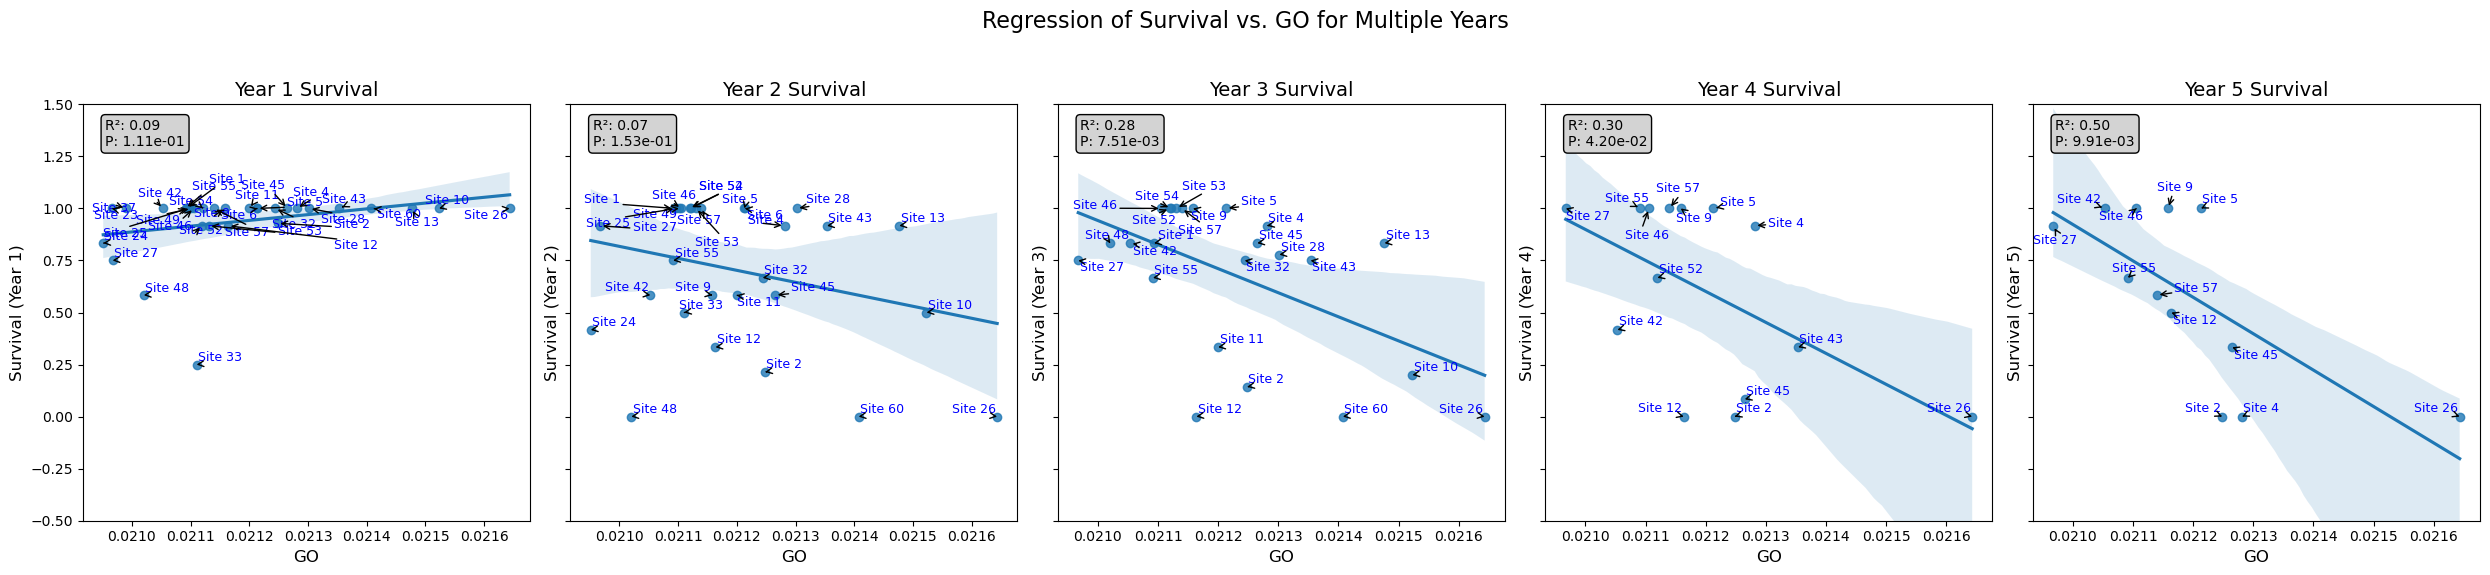

[    site  1_survival        go
 0    1.0    1.000000  0.021093
 1    2.0    0.928571  0.021248
 2    4.0    1.000000  0.021281
 3    5.0    1.000000  0.021213
 4    6.0    1.000000  0.021214
 5    9.0    1.000000  0.021158
 6   10.0    1.000000  0.021523
 7   11.0    1.000000  0.021200
 8   12.0    0.916667  0.021164
 9   13.0    1.000000  0.021477
 10  23.0    1.000000  0.020966
 11  24.0    0.833333  0.020951
 12  25.0    1.000000  0.021097
 13  26.0    1.000000  0.021643
 14  27.0    0.750000  0.020967
 15  28.0    1.000000  0.021302
 16  32.0    1.000000  0.021244
 17  33.0    0.250000  0.021110
 18  37.0    1.000000  0.020990
 19  42.0    1.000000  0.021053
 20  43.0    1.000000  0.021354
 21  45.0    1.000000  0.021265
 22  46.0    1.000000  0.021106
 23  48.0    0.583333  0.021020
 24  49.0    1.000000  0.021101
 25  52.0    0.916667  0.021120
 26  53.0    0.916667  0.021131
 27  54.0    1.000000  0.021121
 28  55.0    1.000000  0.021091
 29  57.0    1.000000  0.021139
 30  60.

In [28]:
analyze_survival_multiyear(survival, go_site, years=5)

In [ ]:
go_site = pd.read_csv('../binomial_regression_firstgen_go/go_sign_snps_from_founder_pop_l1o.csv')

Year 1 - Slope: 27.0643, Intercept: 0.6933
R-squared: 0.0385, P-value: 2.8999e-01
Year 2 - Slope: -20.1828, Intercept: 0.8866
R-squared: 0.0047, P-value: 7.2396e-01
Year 3 - Slope: -107.9316, Intercept: 1.6726
R-squared: 0.1344, P-value: 7.8044e-02
Year 4 - Slope: -90.6059, Intercept: 1.4268
R-squared: 0.0524, P-value: 4.3124e-01
Year 5 - Slope: -144.3084, Intercept: 1.9237
R-squared: 0.1472, P-value: 2.1827e-01


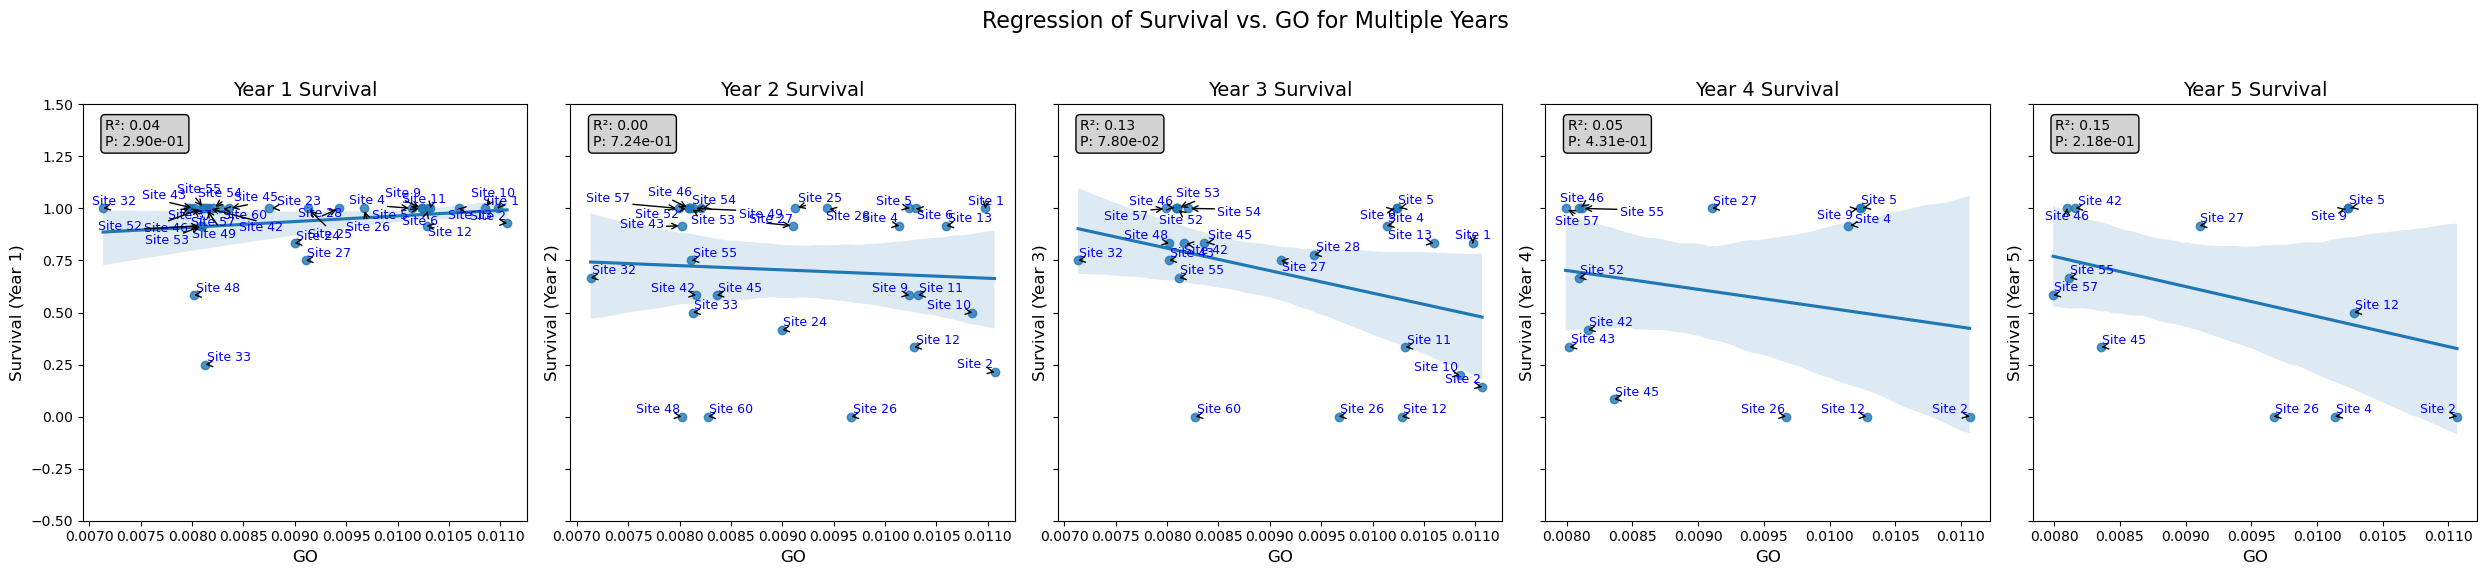

[    site  1_survival        go
 0    1.0    1.000000  0.010975
 1    2.0    0.928571  0.011065
 2    4.0    1.000000  0.010138
 3    5.0    1.000000  0.010236
 4    6.0    1.000000  0.010300
 5    9.0    1.000000  0.010235
 6   10.0    1.000000  0.010850
 7   11.0    1.000000  0.010319
 8   12.0    0.916667  0.010282
 9   13.0    1.000000  0.010595
 10  23.0    1.000000  0.008751
 11  24.0    0.833333  0.008997
 12  25.0    1.000000  0.009125
 13  26.0    1.000000  0.009670
 14  27.0    0.750000  0.009106
 15  28.0    1.000000  0.009431
 16  32.0    1.000000  0.007134
 17  33.0    0.250000  0.008130
 18  37.0    1.000000  0.007964
 19  42.0    1.000000  0.008162
 20  43.0    1.000000  0.008020
 21  45.0    1.000000  0.008360
 22  46.0    1.000000  0.008096
 23  48.0    0.583333  0.008019
 24  49.0    1.000000  0.008132
 25  52.0    0.916667  0.008090
 26  53.0    0.916667  0.008101
 27  54.0    1.000000  0.008205
 28  55.0    1.000000  0.008115
 29  57.0    1.000000  0.007992
 30  60.

In [25]:
## sign snps and leave one out 
analyze_survival_multiyear(survival, go_site, years=5)

Year 1 - Slope: 0.9290, Intercept: 0.9213
R-squared: 0.0030, P-value: 7.6948e-01
Year 2 - Slope: -14.8020, Intercept: 0.9772
R-squared: 0.1734, P-value: 2.4633e-02
Year 3 - Slope: -16.5451, Intercept: 1.0006
R-squared: 0.2261, P-value: 1.8849e-02
Year 4 - Slope: -12.1572, Intercept: 0.8272
R-squared: 0.1069, P-value: 2.5388e-01
Year 5 - Slope: -12.2728, Intercept: 0.8153
R-squared: 0.1417, P-value: 2.2772e-01


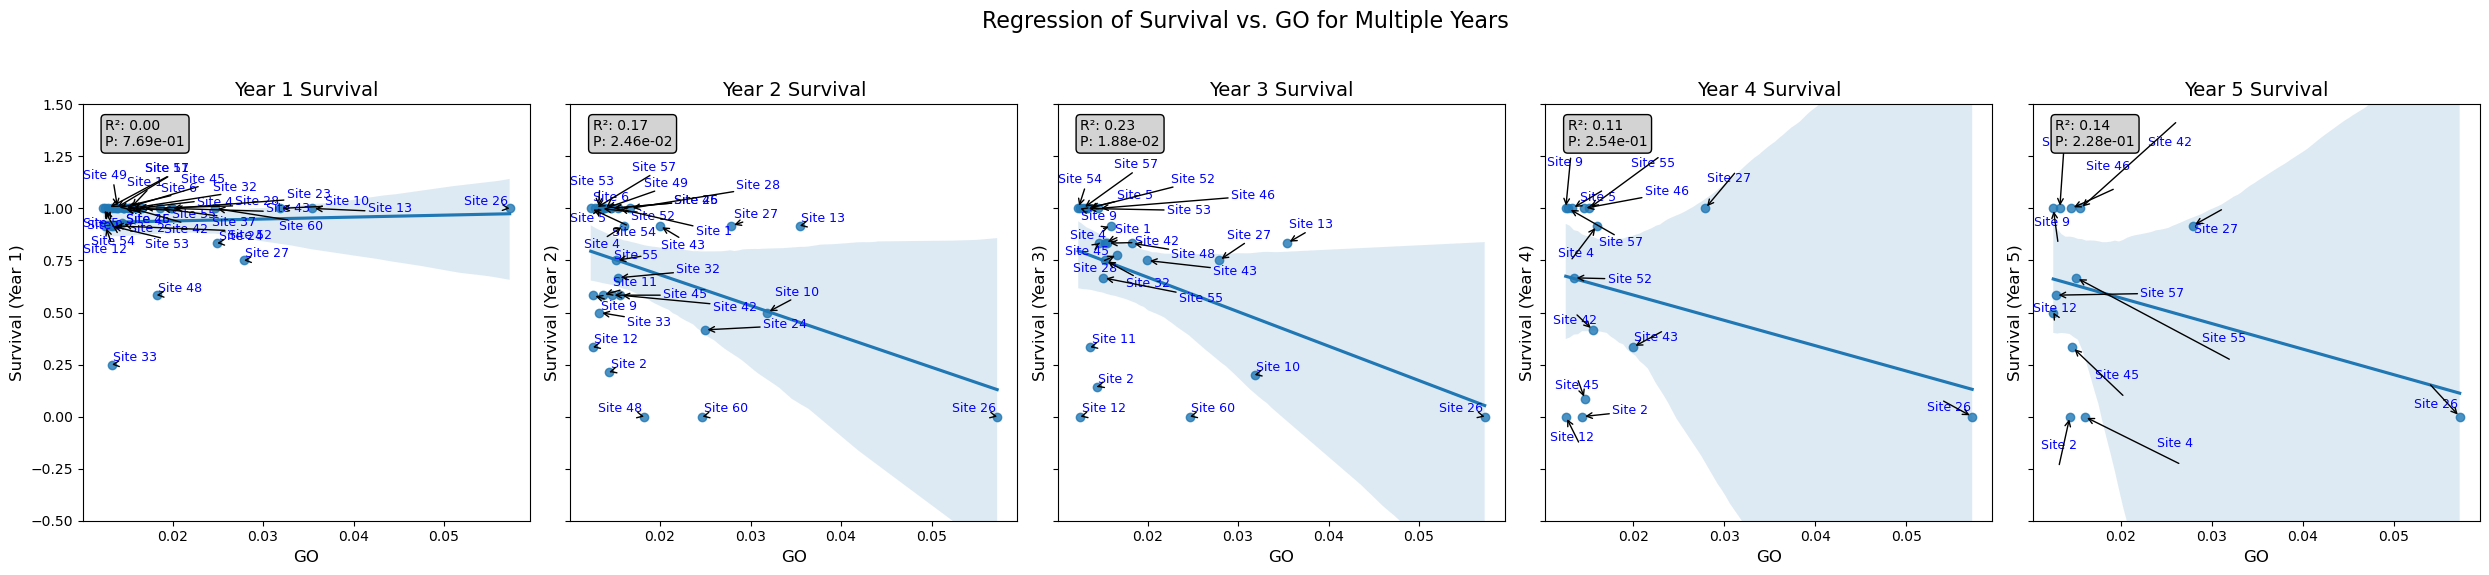

[    site  1_survival        go
 0    1.0    1.000000  0.015315
 1    2.0    0.928571  0.014401
 2    4.0    1.000000  0.016017
 3    5.0    1.000000  0.013293
 4    6.0    1.000000  0.013857
 5    9.0    1.000000  0.012573
 6   10.0    1.000000  0.031829
 7   11.0    1.000000  0.013665
 8   12.0    0.916667  0.012587
 9   13.0    1.000000  0.035445
 10  23.0    1.000000  0.019793
 11  24.0    0.833333  0.024936
 12  25.0    1.000000  0.014625
 13  26.0    1.000000  0.057255
 14  27.0    0.750000  0.027900
 15  28.0    1.000000  0.016679
 16  32.0    1.000000  0.015353
 17  33.0    0.250000  0.013310
 18  37.0    1.000000  0.018610
 19  42.0    1.000000  0.015551
 20  43.0    1.000000  0.019963
 21  45.0    1.000000  0.014683
 22  46.0    1.000000  0.014565
 23  48.0    0.583333  0.018243
 24  49.0    1.000000  0.013941
 25  52.0    0.916667  0.013463
 26  53.0    0.916667  0.013208
 27  54.0    1.000000  0.012345
 28  55.0    1.000000  0.015119
 29  57.0    1.000000  0.012852
 30  60.

In [21]:
#only bio1
analyze_survival_multiyear(survival, go_site, years=5)

Year 1 - Slope: 8.0719, Intercept: 0.8847
R-squared: 0.0076, P-value: 6.4007e-01
Year 2 - Slope: -159.6748, Intercept: 1.7273
R-squared: 0.2723, P-value: 3.6914e-03
Year 3 - Slope: -126.0024, Intercept: 1.5220
R-squared: 0.2030, P-value: 3.0949e-02
Year 4 - Slope: -92.8879, Intercept: 1.2433
R-squared: 0.0856, P-value: 3.3189e-01
Year 5 - Slope: -113.0215, Intercept: 1.3142
R-squared: 0.1407, P-value: 2.5564e-01


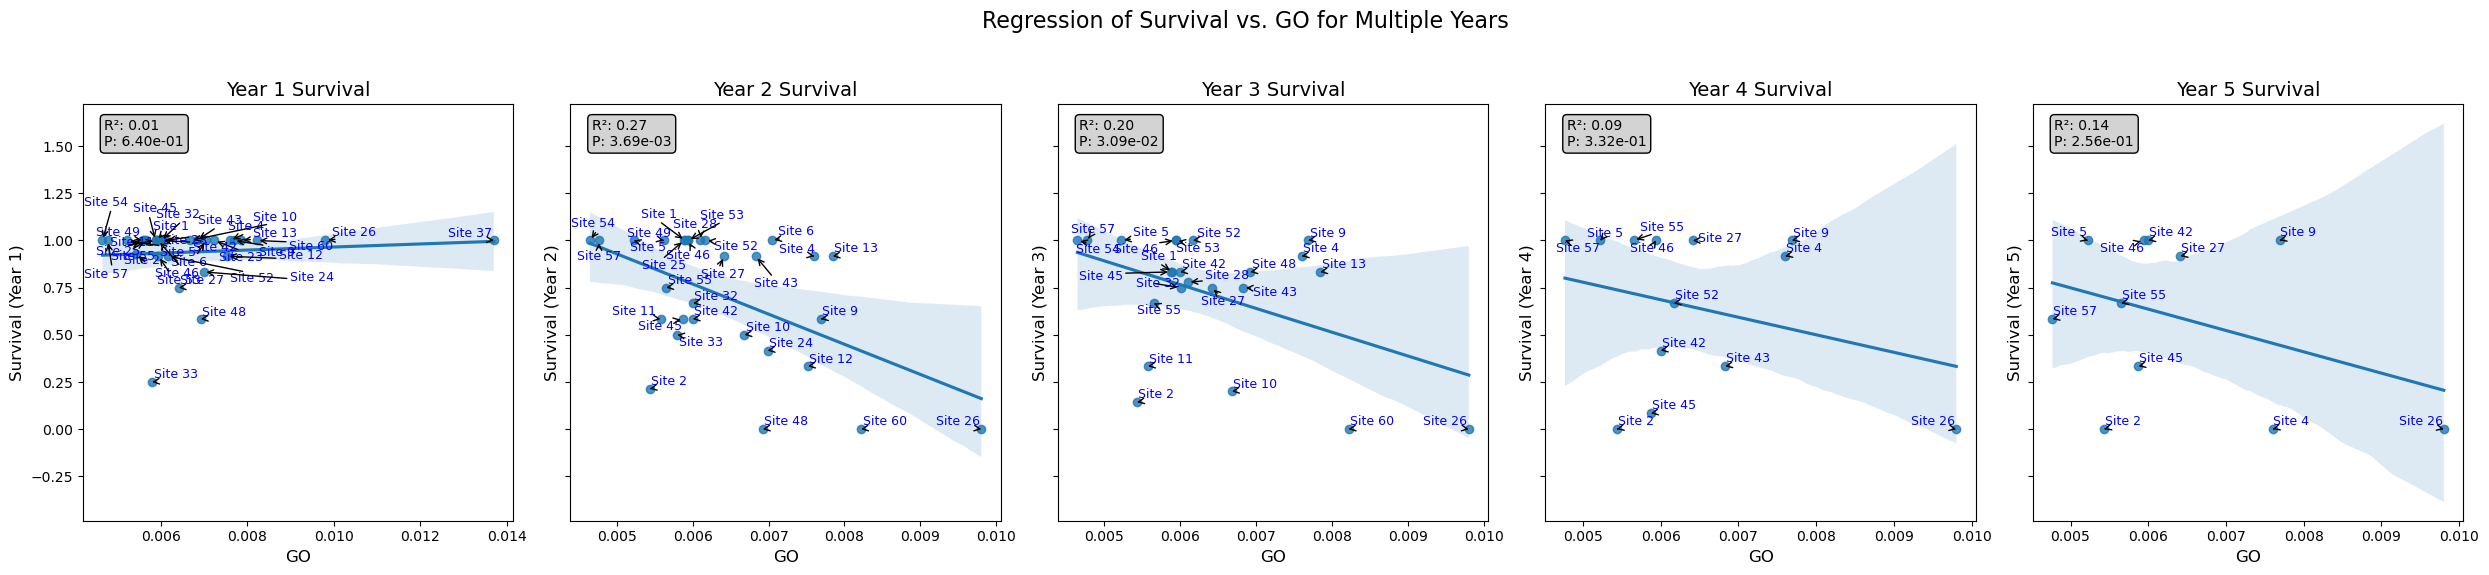

[    site  1_survival        go
 0    1.0    1.000000  0.005898
 1    2.0    0.928571  0.005433
 2    4.0    1.000000  0.007601
 3    5.0    1.000000  0.005224
 4    6.0    1.000000  0.007039
 5    9.0    1.000000  0.007689
 6   10.0    1.000000  0.006682
 7   11.0    1.000000  0.005576
 8   12.0    0.916667  0.007519
 9   13.0    1.000000  0.007845
 10  23.0    1.000000  0.007239
 11  24.0    0.833333  0.006987
 12  25.0    1.000000  0.005885
 13  26.0    1.000000  0.009803
 14  27.0    0.750000  0.006414
 15  28.0    1.000000  0.006101
 16  32.0    1.000000  0.006005
 17  33.0    0.250000  0.005797
 18  37.0    1.000000  0.013704
 19  42.0    1.000000  0.006000
 20  43.0    1.000000  0.006830
 21  45.0    1.000000  0.005874
 22  46.0    1.000000  0.005939
 23  48.0    0.583333  0.006924
 24  49.0    1.000000  0.005619
 25  52.0    0.916667  0.006167
 26  53.0    0.916667  0.005940
 27  54.0    1.000000  0.004647
 28  55.0    1.000000  0.005651
 29  57.0    1.000000  0.004768
 30  60.

In [28]:
#only sign
analyze_survival_multiyear(survival, go_site, years=5)

Year 1 - Slope: 277.1804, Intercept: -4.9336
R-squared: 0.0853, P-value: 1.1083e-01
Year 2 - Slope: -575.7509, Intercept: 12.9086
R-squared: 0.0742, P-value: 1.5282e-01
Year 3 - Slope: -1155.2995, Intercept: 25.2030
R-squared: 0.2826, P-value: 7.5057e-03
Year 4 - Slope: -1487.0532, Intercept: 32.1270
R-squared: 0.3015, P-value: 4.1984e-02
Year 5 - Slope: -1747.8373, Intercept: 37.6272
R-squared: 0.5019, P-value: 9.9104e-03


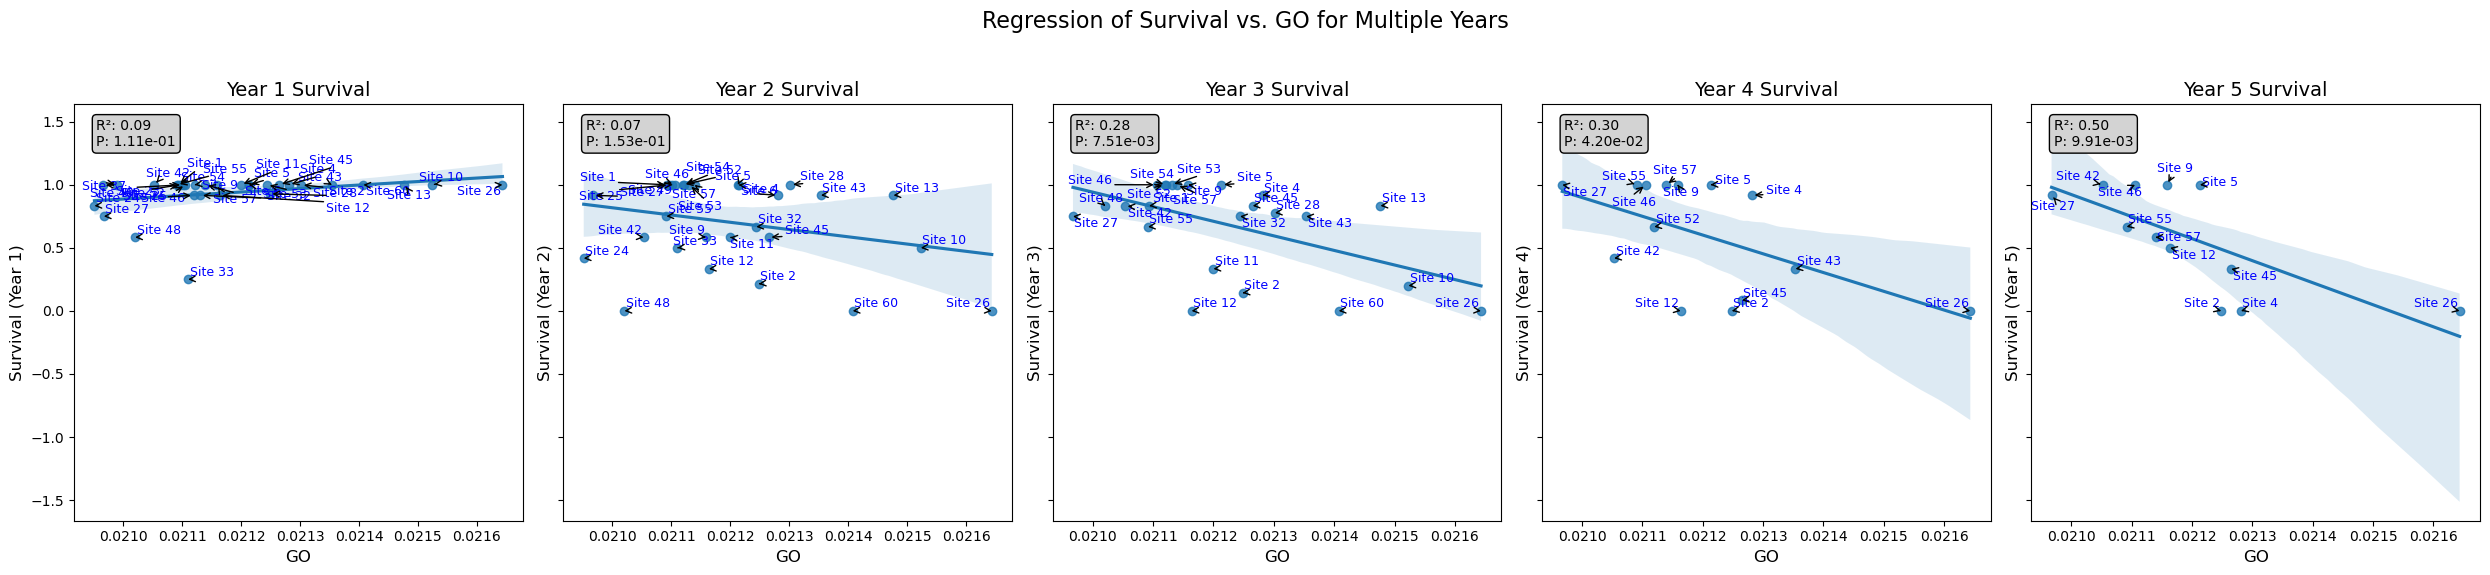

[    site  1_survival        go
 0    1.0    1.000000  0.021093
 1    2.0    0.928571  0.021248
 2    4.0    1.000000  0.021281
 3    5.0    1.000000  0.021213
 4    6.0    1.000000  0.021214
 5    9.0    1.000000  0.021158
 6   10.0    1.000000  0.021523
 7   11.0    1.000000  0.021200
 8   12.0    0.916667  0.021164
 9   13.0    1.000000  0.021477
 10  23.0    1.000000  0.020966
 11  24.0    0.833333  0.020951
 12  25.0    1.000000  0.021097
 13  26.0    1.000000  0.021643
 14  27.0    0.750000  0.020967
 15  28.0    1.000000  0.021302
 16  32.0    1.000000  0.021244
 17  33.0    0.250000  0.021110
 18  37.0    1.000000  0.020990
 19  42.0    1.000000  0.021053
 20  43.0    1.000000  0.021354
 21  45.0    1.000000  0.021265
 22  46.0    1.000000  0.021106
 23  48.0    0.583333  0.021020
 24  49.0    1.000000  0.021101
 25  52.0    0.916667  0.021120
 26  53.0    0.916667  0.021131
 27  54.0    1.000000  0.021121
 28  55.0    1.000000  0.021091
 29  57.0    1.000000  0.021139
 30  60.

In [35]:
analyze_survival_multiyear(survival, go_site, years=5)

In [37]:
fake_go.merge()

,site,go
0,1,10.209418
1,2,15.251102
2,3,8.468067
3,4,16.571302
4,5,14.758169
5,6,14.695465
6,7,10.797765
7,9,12.665856
8,10,20.292248
9,11,14.228216


In [50]:
fake_go = env[['site', 'bio1']].copy()

In [40]:
fake_go = go_site.merge(fake_go,on='site')[['site', 'bio1']]

In [51]:
fake_go.columns = ['site', 'go']

Year 1 - Slope: 0.0291, Intercept: 0.4123
R-squared: 0.1111, P-value: 3.5613e-02
Year 2 - Slope: 0.0033, Intercept: 0.5365
R-squared: 0.0012, P-value: 8.3728e-01
Year 3 - Slope: 0.0114, Intercept: 0.3684
R-squared: 0.0146, P-value: 5.1068e-01
Year 4 - Slope: 0.0082, Intercept: 0.2863
R-squared: 0.0064, P-value: 7.2332e-01
Year 5 - Slope: -0.0161, Intercept: 0.5629
R-squared: 0.0188, P-value: 5.7587e-01


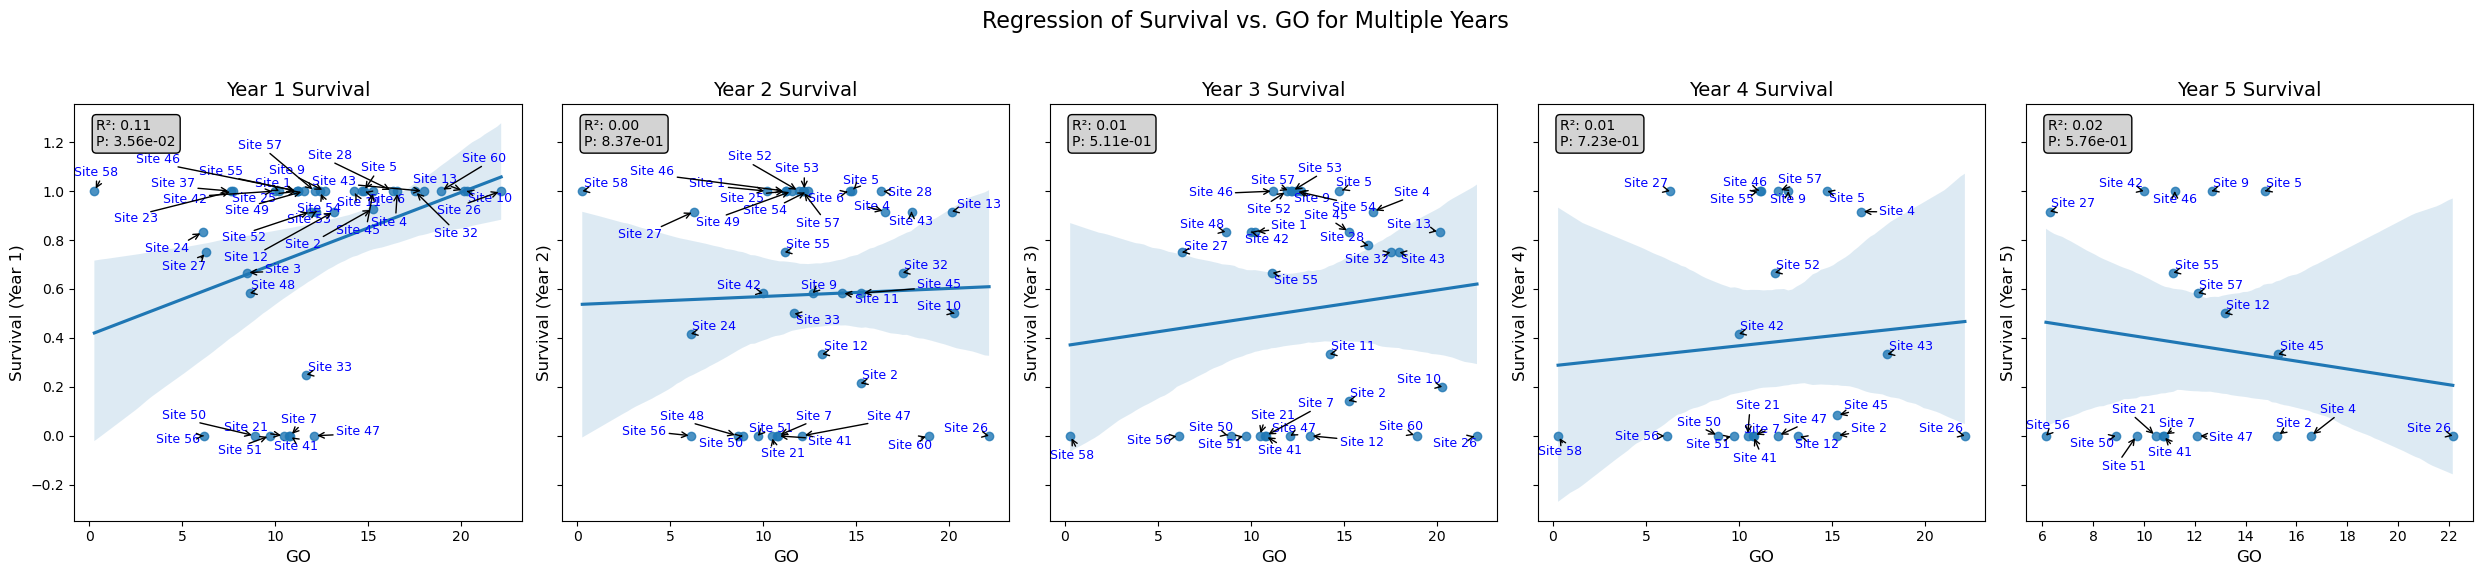

[    site  1_survival         go
 0    1.0    1.000000  10.209418
 1    2.0    0.928571  15.251102
 2    3.0    0.666667   8.468067
 3    4.0    1.000000  16.571302
 4    5.0    1.000000  14.758169
 5    6.0    1.000000  14.695465
 6    7.0    0.000000  10.797765
 7    9.0    1.000000  12.665856
 8   10.0    1.000000  20.292248
 9   11.0    1.000000  14.228216
 10  12.0    0.916667  13.172423
 11  13.0    1.000000  20.153398
 12  21.0    0.000000  10.468105
 13  23.0    1.000000   7.716092
 14  24.0    0.833333   6.107150
 15  25.0    1.000000  11.253097
 16  26.0    1.000000  22.155024
 17  27.0    0.750000   6.296812
 18  28.0    1.000000  16.319978
 19  32.0    1.000000  17.506254
 20  33.0    0.250000  11.683929
 21  37.0    1.000000   7.622953
 22  41.0    0.000000  10.766147
 23  42.0    1.000000   9.999745
 24  43.0    1.000000  17.982793
 25  45.0    1.000000  15.279566
 26  46.0    1.000000  11.209686
 27  47.0    0.000000  12.108131
 28  48.0    0.583333   8.633356
 29  49.0 

In [58]:
##fuldata only bio1
analyze_survival_multiyear(survival, fake_go, years=5)

Year 1 - Slope: 0.0095, Intercept: 0.8112
R-squared: 0.0768, P-value: 1.1854e-01
Year 2 - Slope: -0.0185, Intercept: 0.9581
R-squared: 0.0637, P-value: 1.7854e-01
Year 3 - Slope: -0.0116, Intercept: 0.8173
R-squared: 0.0219, P-value: 4.8005e-01
Year 4 - Slope: -0.0120, Intercept: 0.7134
R-squared: 0.0180, P-value: 6.3373e-01
Year 5 - Slope: -0.0773, Intercept: 1.6184
R-squared: 0.5328, P-value: 7.0360e-03


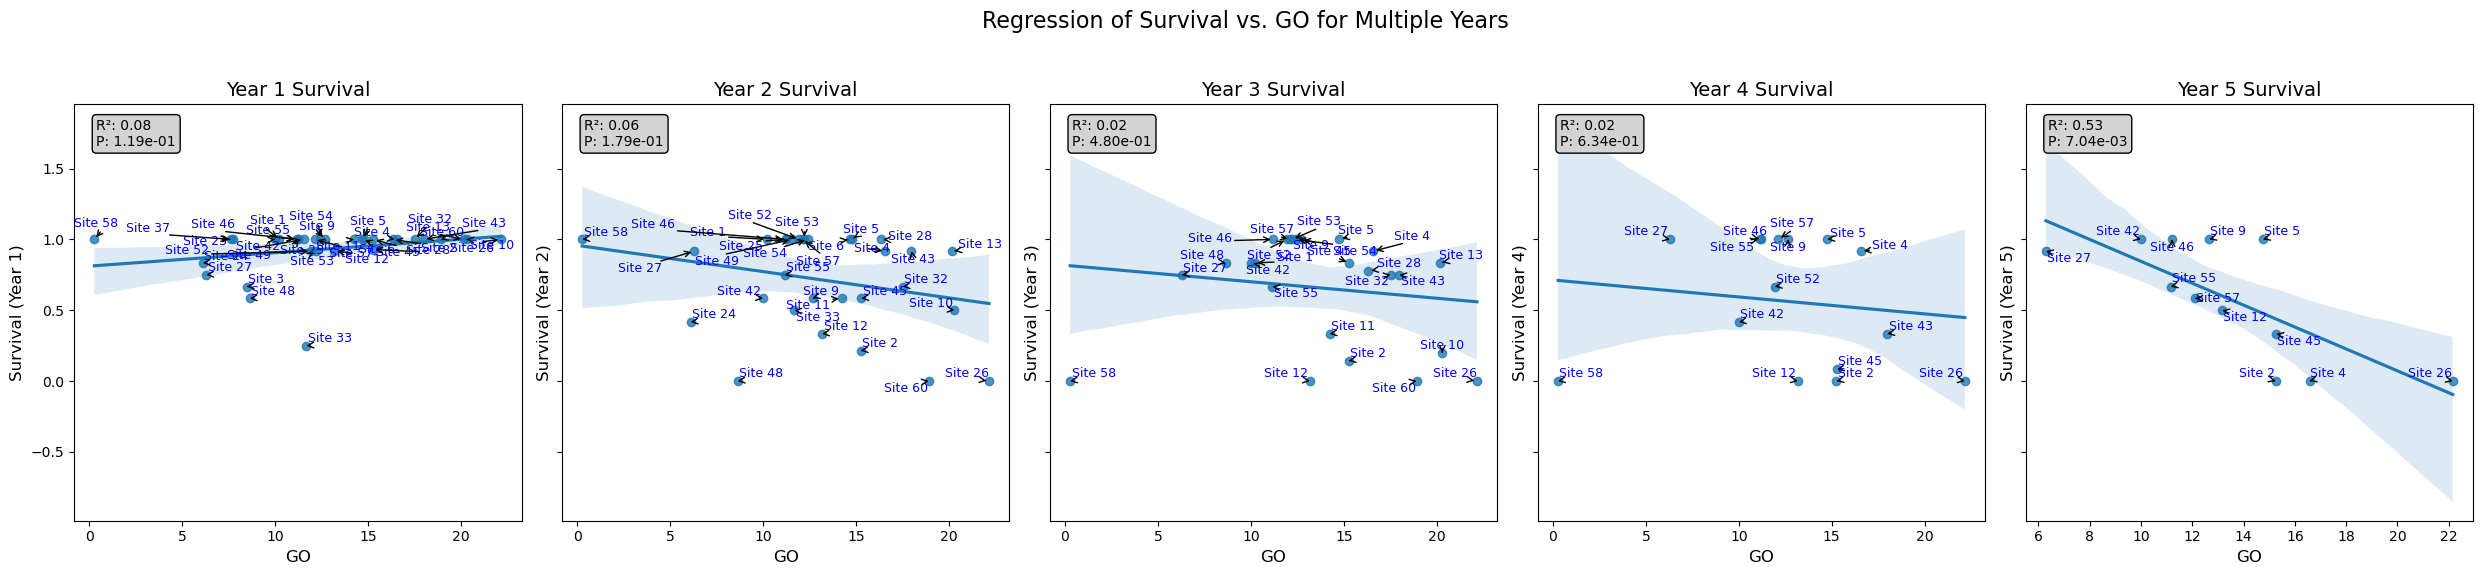

[    site  1_survival         go
 0    1.0    1.000000  10.209418
 1    2.0    0.928571  15.251102
 2    3.0    0.666667   8.468067
 3    4.0    1.000000  16.571302
 4    5.0    1.000000  14.758169
 5    6.0    1.000000  14.695465
 6    9.0    1.000000  12.665856
 7   10.0    1.000000  20.292248
 8   11.0    1.000000  14.228216
 9   12.0    0.916667  13.172423
 10  13.0    1.000000  20.153398
 11  23.0    1.000000   7.716092
 12  24.0    0.833333   6.107150
 13  25.0    1.000000  11.253097
 14  26.0    1.000000  22.155024
 15  27.0    0.750000   6.296812
 16  28.0    1.000000  16.319978
 17  32.0    1.000000  17.506254
 18  33.0    0.250000  11.683929
 19  37.0    1.000000   7.622953
 20  42.0    1.000000   9.999745
 21  43.0    1.000000  17.982793
 22  45.0    1.000000  15.279566
 23  46.0    1.000000  11.209686
 24  48.0    0.583333   8.633356
 25  49.0    1.000000  11.552349
 26  52.0    0.916667  11.929316
 27  53.0    0.916667  12.215540
 28  54.0    1.000000  12.402168
 29  55.0 

In [52]:
##fuldata
analyze_survival_multiyear(survival, fake_go, years=5)

Year 1 - Slope: 0.0121, Intercept: 0.7774
R-squared: 0.1017, P-value: 8.0408e-02
Year 2 - Slope: -0.0171, Intercept: 0.9370
R-squared: 0.0400, P-value: 2.9854e-01
Year 3 - Slope: -0.0431, Intercept: 1.2986
R-squared: 0.2281, P-value: 1.8271e-02
Year 4 - Slope: -0.0613, Intercept: 1.4350
R-squared: 0.2865, P-value: 4.8551e-02
Year 5 - Slope: -0.0773, Intercept: 1.6184
R-squared: 0.5328, P-value: 7.0360e-03


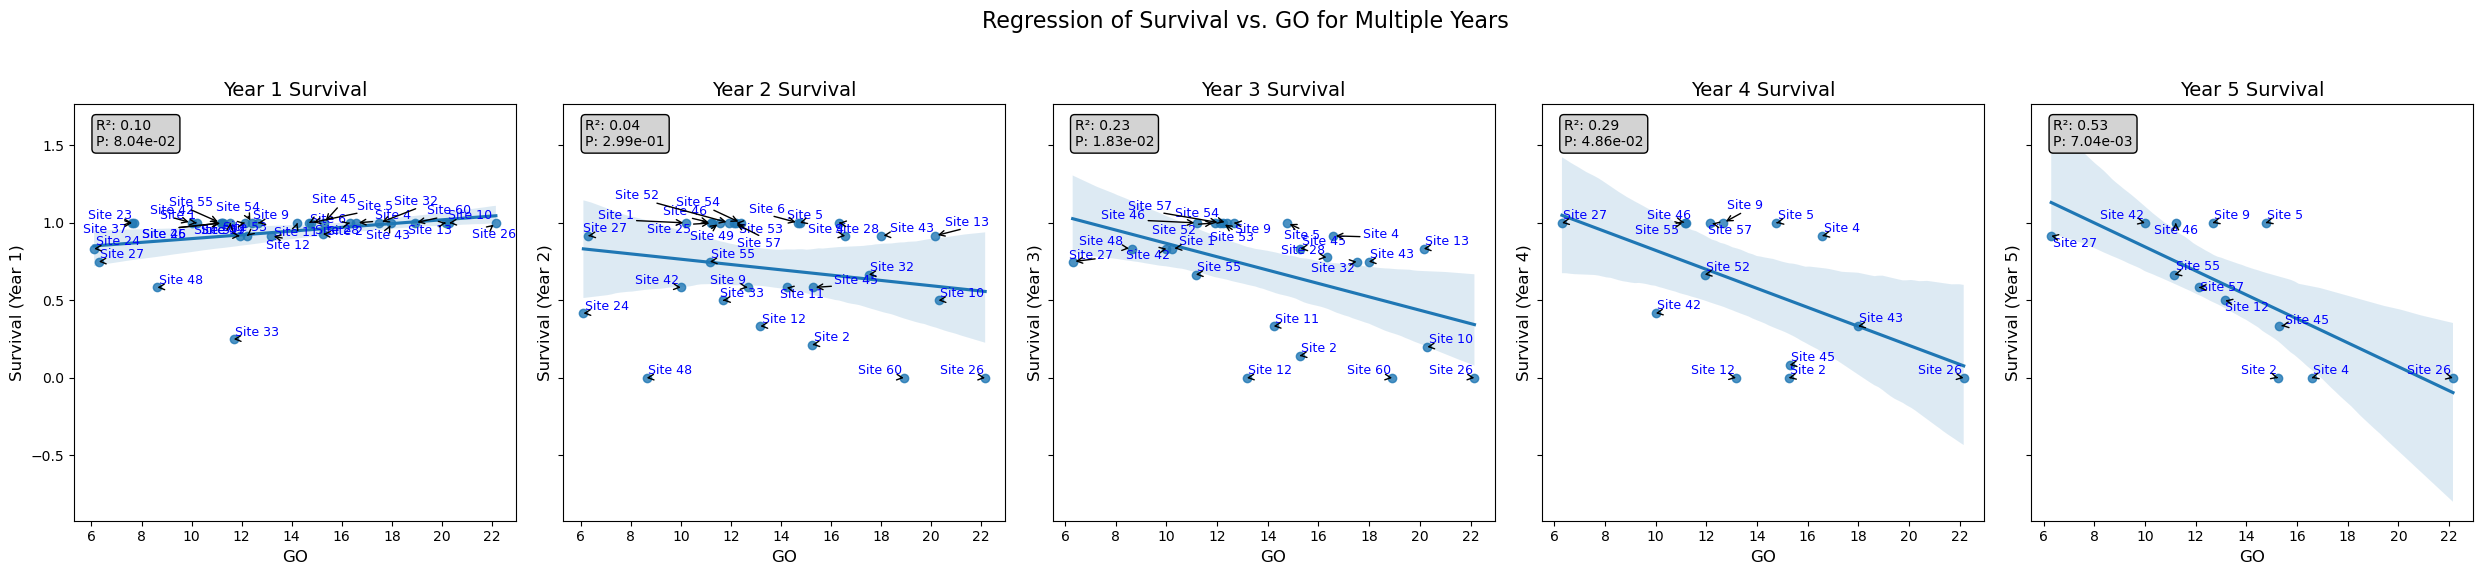

[    site  1_survival         go
 0    1.0    1.000000  10.209418
 1    2.0    0.928571  15.251102
 2    4.0    1.000000  16.571302
 3    5.0    1.000000  14.758169
 4    6.0    1.000000  14.695465
 5    9.0    1.000000  12.665856
 6   10.0    1.000000  20.292248
 7   11.0    1.000000  14.228216
 8   12.0    0.916667  13.172423
 9   13.0    1.000000  20.153398
 10  23.0    1.000000   7.716092
 11  24.0    0.833333   6.107150
 12  25.0    1.000000  11.253097
 13  26.0    1.000000  22.155024
 14  27.0    0.750000   6.296812
 15  28.0    1.000000  16.319978
 16  32.0    1.000000  17.506254
 17  33.0    0.250000  11.683929
 18  37.0    1.000000   7.622953
 19  42.0    1.000000   9.999745
 20  43.0    1.000000  17.982793
 21  45.0    1.000000  15.279566
 22  46.0    1.000000  11.209686
 23  48.0    0.583333   8.633356
 24  49.0    1.000000  11.552349
 25  52.0    0.916667  11.929316
 26  53.0    0.916667  12.215540
 27  54.0    1.000000  12.402168
 28  55.0    1.000000  11.156632
 29  57.0 

In [43]:
analyze_survival_multiyear(survival, fake_go, years=5)